In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from PIL import Image
from google.colab import drive


drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/dataset'
if os.path.exists(data_path):
    print("Dataset path exists.")
else:
    print("Dataset path does NOT exist.")

Mounted at /content/drive
Dataset path exists.


In [ ]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.5 MB/s eta 0:00:00


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "Best_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast_1 (Cast)                        │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,3

 Total params: 2,461,764 (9.39 MB)

 Trainable params: 2,459,844 (9.38 MB)

 Non-trainable params: 1,920 (7.50 KB)

None
Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 273ms/step - accuracy: 0.3461 - loss: 2.3623 - val_accuracy: 0.2300 - val_loss: 2.1091
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 270ms/step - accuracy: 0.4169 - loss: 2.0998 - val_accuracy: 0.2250 - val_loss: 2.1215
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 255ms/step - accuracy: 0.4364 - loss: 1.9628 - val_accuracy: 0.2225 - val_loss: 2.1695
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - accuracy: 0.5032 - loss: 1.8946 - val_accuracy: 0.2350 - val_loss: 2.1329
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 266ms/step - accuracy: 0.4860 - loss: 1.8429 - val_accuracy: 0.4075 - val_loss: 1.9365
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 253ms/step - accuracy: 0.5317 - loss: 1.8000 - val_accuracy: 0.5400 - val_loss: 1.7903
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 255ms/step - accuracy: 0.5379 - loss: 1.7452 - val_accuracy: 0.5600 - val_loss: 1.7538
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 250ms/step - accuracy: 0.5400 - lo

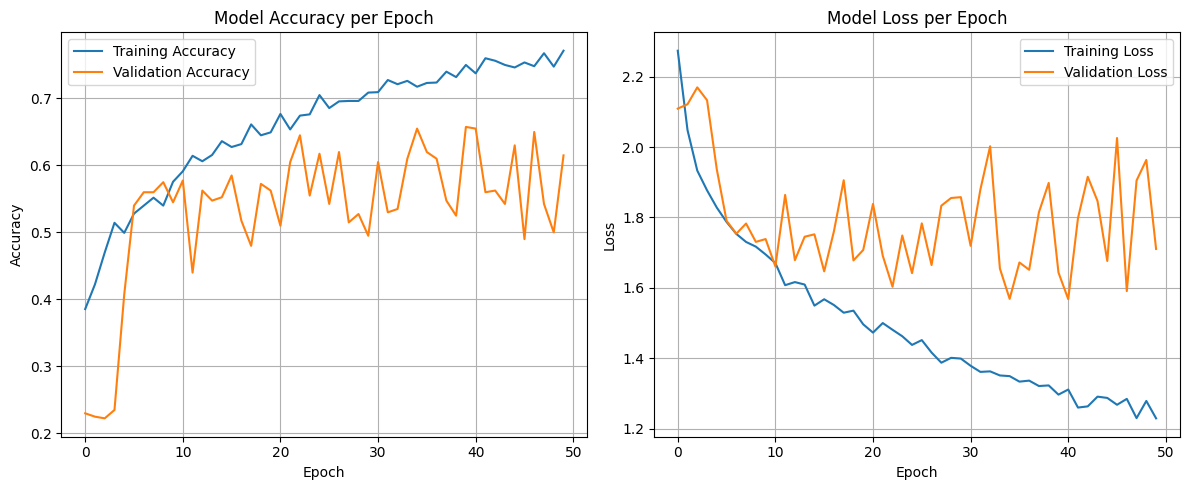

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#  **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# 🔹 **Load and Preprocess Dataset with STRONGER Augmentation**
def load_dataset(directory, subset, validation_split=0.2, batch_size=16, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names

    # Normalize images (0 to 1)
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    #  STRONGER Data Augmentation
    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.3),  #  Increased Rotation
            layers.RandomZoom(0.3),      #  Increased Zoom
            layers.RandomContrast(0.3),
            layers.RandomTranslation(height_factor=0.3, width_factor=0.3),  #  More movement
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names


#  Load Training & Validation Datasets
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=16, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=16, augment=False)

#  Get Number of Classes
num_classes = len(class_names)


# 🔹 **Fixed CNN Model**
def build_best_cnn():
    inputs = keras.Input(shape=(128, 128, 3))

    # 🔹 Block 1
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0005))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0005))(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # 🔹 Block 2
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0005))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0005))(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # 🔹 Block 3
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0005))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0005))(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # 🔹 Block 4
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0005))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # 🔹 Fully Connected Layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0005))(x)
    x = layers.Dropout(0.6)(x)  #  Increased Dropout
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="Best_CNN")

    #  Smaller Learning Rate (More Stability)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.00005),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


#  **Train Model**
model = build_best_cnn()
print(model.summary())

#  Training Model with 50 Epochs
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

#  **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

#  **Save Model**
model.save('best_cnn_model.keras')


#  **Plot Training & Validation Accuracy**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

#  **Plot Training & Validation Loss**
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "Perfect_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast_2 (Cast)                        │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 128, 128, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 32, 32, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 16, 16, 1024)        │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 16, 16, 1024)        │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 8, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         524,8

 Total params: 9,830,532 (37.50 MB)

 Trainable params: 9,826,692 (37.49 MB)

 Non-trainable params: 3,840 (15.00 KB)

None
Epoch 1/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 209s 377ms/step - accuracy: 0.3440 - loss: 2.1687 - val_accuracy: 0.2250 - val_loss: 1.6887 - learning_rate: 2.0000e-05
Epoch 2/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 88s 294ms/step - accuracy: 0.3740 - loss: 1.8807 - val_accuracy: 0.2250 - val_loss: 1.7530 - learning_rate: 2.0000e-05
Epoch 3/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 275ms/step - accuracy: 0.4240 - loss: 1.7458 - val_accuracy: 0.2250 - val_loss: 1.8510 - learning_rate: 2.0000e-05
Epoch 4/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.4009 - loss: 1.6680
Epoch 4: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - accuracy: 0.4009 - loss: 1.6682 - val_accuracy: 0.2150 - val_loss: 1.7766 - learning_rate: 2.0000e-05
Epoch 5/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 272ms/step - accuracy: 0.4796 - loss: 1.5672 - val_accuracy: 0.3375 - val_loss: 1.6316 - learning_rate: 1.0000e-05
Epoch 6/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 27

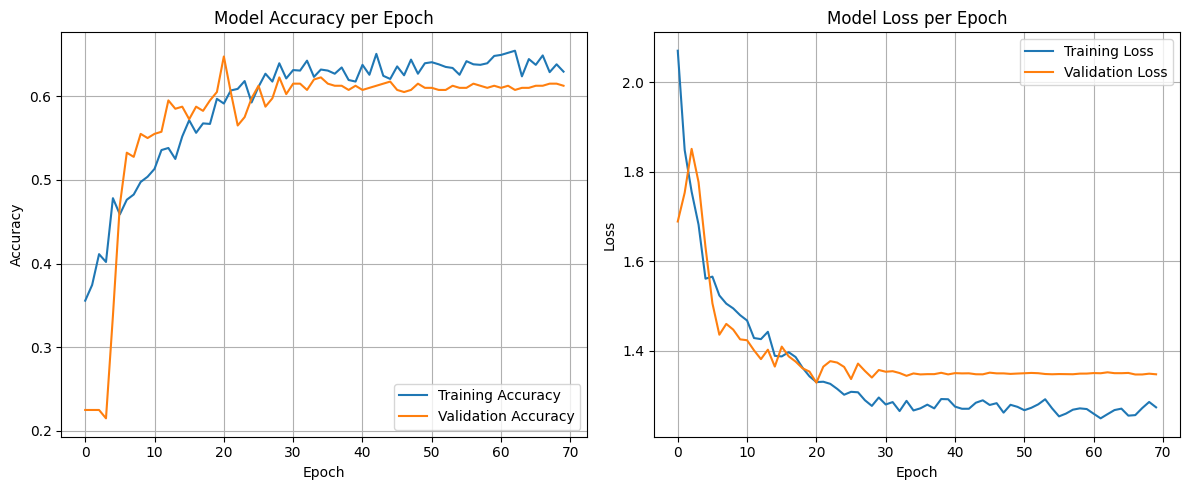

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#  **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# 🔹 **Load and Preprocess Dataset with STRONGER Augmentation**
def load_dataset(directory, subset, validation_split=0.2, batch_size=16, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names

    # Normalize images (0 to 1)
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    #  STRONGER Data Augmentation (For Near-Perfect Generalization)
    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.4),  #  Max Augmentation
            layers.RandomZoom(0.4),
            layers.RandomContrast(0.4),
            layers.RandomTranslation(height_factor=0.4, width_factor=0.4),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names


#  Load Training & Validation Datasets
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=16, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=16, augment=False)

#  Get Number of Classes
num_classes = len(class_names)


# **Final Optimized CNN Model**
def build_perfect_cnn():
    inputs = keras.Input(shape=(128, 128, 3))

    #  Block 1
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0001))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0001))(x)
    x = layers.MaxPooling2D((2, 2))(x)

    #  Block 2
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0001))(x)
    x = layers.MaxPooling2D((2, 2))(x)

    #  Block 3 (More Filters for Stronger Feature Extraction)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0001))(x)
    x = layers.MaxPooling2D((2, 2))(x)

    #  Block 4
    x = layers.Conv2D(1024, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    #  Fully Connected Layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001))(x)
    x = layers.Dropout(0.7)(x)  # Prevents Overfitting
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="Perfect_CNN")

    # Switched to `AdamW` Optimizer for Better Learning
    model.compile(
        optimizer=keras.optimizers.AdamW(learning_rate=0.00002, weight_decay=0.0001),
        loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),  # ✅ Prevents Overconfident Predictions
        metrics=['accuracy']
    )

    return model


#  **Train Model**
model = build_perfect_cnn()
print(model.summary())

#  Use `ReduceLROnPlateau` for Dynamic Learning Rate
clr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

#  Training Model with 70 Epochs (More Training for Perfection)
history = model.fit(train_ds, epochs=70, validation_data=val_ds, callbacks=[clr_scheduler])

#  **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save Model**
model.save('perfect_cnn_model.keras')


#  **Plot Training & Validation Accuracy**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

#  **Plot Training & Validation Loss**
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "Best_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 128, 128, 128)  │          3,584 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 128, 128, 128)  │            512 │ conv2d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ batch_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 128, 128, 128)  │            512 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 128, 128, 128)  │              0 │ conv2d_9[0][0],        │
│                           │                        │                │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 64, 64, 128)    │              0 │ add[0][0]              │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 64, 64, 256)    │          1,024 │ conv2d_11[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 64, 64, 256)    │        590,080 │ batch_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 64, 64, 256)    │         33,024 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 64, 64, 256)    │              0 │ conv2d_12[0][0],       │
│                           │                        │                │ conv2d_13[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 32, 32, 256)    │              0 │ add_1[0][0]            │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 32, 32, 512)    │          2,048 │ conv2d_14[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)   

 Total params: 19,959,172 (76.14 MB)

 Trainable params: 19,955,332 (76.12 MB)

 Non-trainable params: 3,840 (15.00 KB)

None
Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 105s 944ms/step - accuracy: 0.3726 - loss: 2.1916 - val_accuracy: 0.2300 - val_loss: 1.9398 - learning_rate: 1.0000e-04
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 582ms/step - accuracy: 0.4431 - loss: 1.6943 - val_accuracy: 0.2300 - val_loss: 1.9868 - learning_rate: 1.0000e-04
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 583ms/step - accuracy: 0.5473 - loss: 1.5177 - val_accuracy: 0.2250 - val_loss: 2.2561 - learning_rate: 1.0000e-04
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.5636 - loss: 1.4983
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 573ms/step - accuracy: 0.5639 - loss: 1.4979 - val_accuracy: 0.2250 - val_loss: 2.6058 - learning_rate: 1.0000e-04
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 610ms/step - accuracy: 0.6048 - loss: 1.4490 - val_accuracy: 0.2250 - val_loss: 2.8007 - learning_rate: 5.0000e-05
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 595ms/step - acc

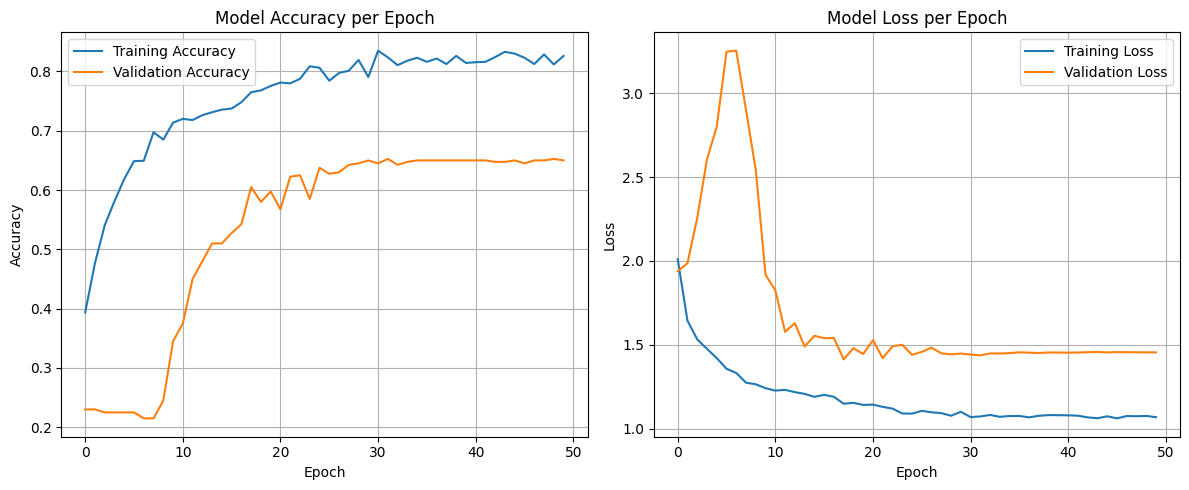

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#  **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# 🔹 **Load and Preprocess Dataset with Augmentation**
def load_dataset(directory, subset, validation_split=0.2, batch_size=32, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names

    # Normalize images (0 to 1)
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    #  STRONGER Data Augmentation
    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.2),
            layers.RandomZoom(0.2),
            layers.RandomContrast(0.2),
            layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names

#  Load Training & Validation Datasets
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=32, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=32, augment=False)

#  Get Number of Classes
num_classes = len(class_names)

# **Final Optimized CNN Model**
def build_best_cnn():
    inputs = keras.Input(shape=(128, 128, 3))

    #  Optimized Convolutional Blocks with Residual Connections
    def conv_block(x, filters):
        shortcut = x  # Save shortcut for residual connection
        x = layers.Conv2D(filters, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(filters, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0001))(x)
        x_res = layers.Conv2D(filters, (1, 1), padding='same')(shortcut)  # Residual Connection
        x = layers.Add()([x, x_res])
        x = layers.MaxPooling2D((2, 2))(x)
        return x

    # Model Architecture (Increased Filters)
    x = conv_block(inputs, 128)
    x = conv_block(x, 256)
    x = conv_block(x, 512)
    x = conv_block(x, 1024)

    #  Global Pooling & Fully Connected Layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001))(x)
    x = layers.Dropout(0.4)(x)  #  Lowered Dropout from 0.7 to 0.4
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="Best_CNN")

    # **Correct Optimizer (Fixed Float Learning Rate)**
    optimizer = keras.optimizers.AdamW(learning_rate=0.0001, weight_decay=0.0001)  #  No Schedule Issue

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),  #  Prevents Overconfident Predictions
        metrics=['accuracy']
    )

    return model

#  **Train Model**
model = build_best_cnn()
print(model.summary())

#  Use `ReduceLROnPlateau` for Dynamic Learning Rate
clr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

#  Training Model with 50 Epochs
history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[clr_scheduler])

#  **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

#  **Save Model**
model.save('best_cnn_model.keras')

#  **Plot Training & Validation Accuracy**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

#  **Plot Training & Validation Loss**
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "KRISHNA_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 1024)        │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 1024)        │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │              

 Total params: 9,830,532 (37.50 MB)

 Trainable params: 9,826,692 (37.49 MB)

 Non-trainable params: 3,840 (15.00 KB)

None
Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 392s 4s/step - accuracy: 0.3467 - loss: 2.1257 - val_accuracy: 0.2250 - val_loss: 1.6822 - learning_rate: 2.0000e-05
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 273ms/step - accuracy: 0.3804 - loss: 1.8769 - val_accuracy: 0.2250 - val_loss: 1.8536 - learning_rate: 2.0000e-05
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 270ms/step - accuracy: 0.4556 - loss: 1.6615 - val_accuracy: 0.2250 - val_loss: 1.9633 - learning_rate: 2.0000e-05
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.4258 - loss: 1.6539
Epoch 4: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 265ms/step - accuracy: 0.4260 - loss: 1.6536 - val_accuracy: 0.2250 - val_loss: 2.0268 - learning_rate: 2.0000e-05
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 281ms/step - accuracy: 0.4589 - loss: 1.5542 - val_accuracy: 0.3175 - val_loss: 1.6611 - learning_rate: 1.0000e-05
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s

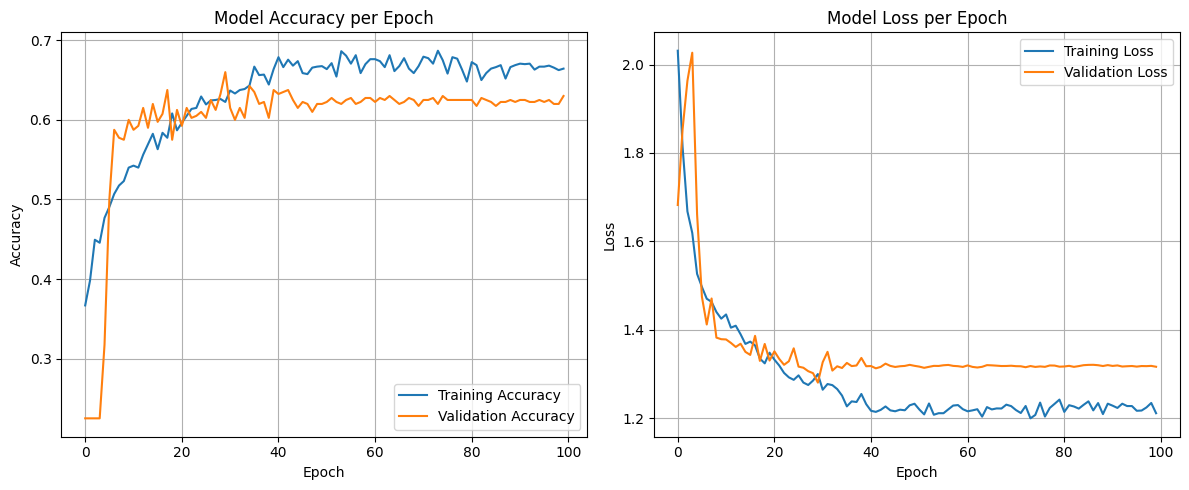

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#  **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

#  **Load and Preprocess Dataset with STRONGER Augmentation**
def load_dataset(directory, subset, validation_split=0.2, batch_size=16, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names

    # Normalize images (0 to 1)
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    #  Data Augmentation (For Near-Perfect Generalization)
    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.4),  #  Max Augmentation
            layers.RandomZoom(0.4),
            layers.RandomContrast(0.4),
            layers.RandomTranslation(height_factor=0.4, width_factor=0.4),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names


#  Load Training & Validation Datasets
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=16, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=16, augment=False)

#  Get Number of Classes
num_classes = len(class_names)


# **Final Optimized CNN Model**
def build_perfect_cnn():
    inputs = keras.Input(shape=(128, 128, 3))

    #  Block 1
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0001))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0001))(x)
    x = layers.MaxPooling2D((2, 2))(x)

    #  Block 2
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0001))(x)
    x = layers.MaxPooling2D((2, 2))(x)

    #  Block 3 (More Filters for Stronger Feature Extraction)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0001))(x)
    x = layers.MaxPooling2D((2, 2))(x)

    #  Block 4
    x = layers.Conv2D(1024, (3, 3), activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    #  Fully Connected Layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001))(x)
    x = layers.Dropout(0.7)(x)  # Prevents Overfitting
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="KRISHNA_CNN")

    # Switched to `AdamW` Optimizer for Better Learning
    model.compile(
        optimizer=keras.optimizers.AdamW(learning_rate=0.00002, weight_decay=0.0001),
        loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),  #  Prevents Overconfident Predictions
        metrics=['accuracy']
    )

    return model


#  **Train Model**
model = build_perfect_cnn()
print(model.summary())

#  Use `ReduceLROnPlateau` for Dynamic Learning Rate
clr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

#  Training Model with 70 Epochs (More Training for Perfection)
history = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=[clr_scheduler])

#  **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save Model**
model.save('perfect_cnn_model.keras')

#  **Plot Training & Validation Accuracy**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

#  **Plot Training & Validation Loss**
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.
Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 610s 12s/step - accuracy: 0.2928 - loss: 3.2130 - val_accuracy: 0.2300 - val_loss: 148.7123
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 602s 12s/step - accuracy: 0.2694 - loss: 2.8989 - val_accuracy: 0.2575 - val_loss: 4.2505
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 619s 12s/step - accuracy: 0.2896 - loss: 2.6876 - val_accuracy: 0.2750 - val_loss: 2.5799
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 620s 12s/step - accuracy: 0.3193 - loss: 2.5693 - val_accuracy: 0.2850 - val_loss: 2.4559
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 625s 12s/step - accuracy: 0.3412 - loss: 2.4781 - val_accuracy: 0.3300 - val_loss: 2.4033
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 617s 12s/step - accuracy: 0.3588 - loss: 2.3780 - val_accuracy: 0.2675 - val_loss: 2.3548
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 622s 12s/step - accuracy: 0.3400 - loss: 2.3235

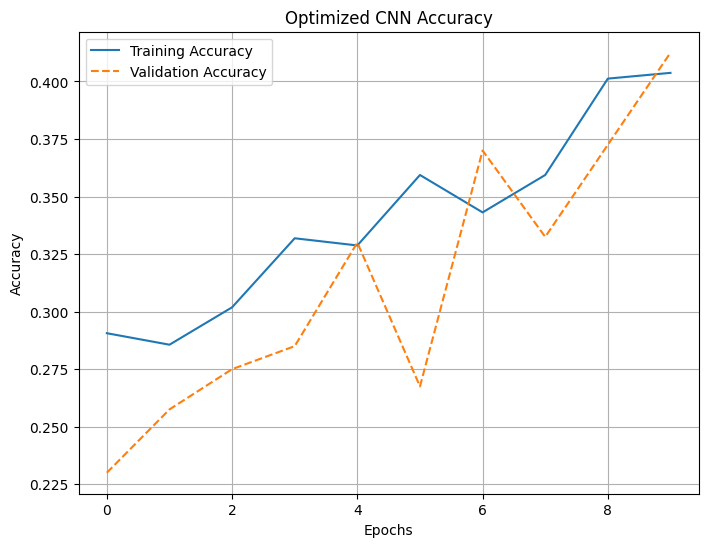

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Classification Report:
               precision    recall  f1-score   support

           0     0.6111    0.1222    0.2037        90
           1     0.4425    0.5435    0.4878        92
           2     0.3790    0.4393    0.4069       107
           3     0.3931    0.5135    0.4453       111

    accuracy                         0.4125       400
   macro avg     0.4564    0.4046    0.3859       400
weighted avg     0.4497    0.4125    0.3905       400



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Define dataset path
data_path = '/content/drive/MyDrive/dataset'

# Load dataset with optimized batch size and augmentation
def load_dataset(directory, subset, validation_split=0.2, batch_size=32):  # Adjusted batch size for stability
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )
    return dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

train_ds = load_dataset(data_path, subset="training", batch_size=32)
val_ds = load_dataset(data_path, subset="validation", batch_size=32)

# **Enhanced Data Augmentation**
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.3),
    layers.RandomContrast(0.3),
    layers.RandomBrightness(0.3)
])

# **Deeper CNN with Advanced Regularization**
def build_custom_model(input_shape=(128, 128, 3), num_classes=4):
    inputs = keras.Input(shape=input_shape)

    x = data_augmentation(inputs)  # Augment data

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0005))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0005))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0005))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0005))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0005))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0005))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0005))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0005))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.GlobalAveragePooling2D()(x)  # Reduces parameters
    x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0005))(x)
    x = layers.Dropout(0.6)(x)  # Increased dropout for better regularization

    x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0005))(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # **Cosine Learning Rate Decay for Stability**
    lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=0.001, decay_steps=2000, alpha=0.0001
    )

    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
                  loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),  # Label smoothing added
                  metrics=['accuracy'])

    return model

# **Define Callbacks**
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# **Train the Model with Updated Parameters**
model = build_custom_model()
history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[early_stopping])

# **Evaluate the Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save the Optimized Model**
model.save('custom_model.keras')

# **Plot Training & Validation Accuracy**
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Optimized CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Get Predictions on Validation Data**
y_true = []
y_pred = []

for images, labels in val_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# **Compute Classification Report**
report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n", report)

Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 354s 6s/step - accuracy: 0.3362 - loss: 51.5560 - val_accuracy: 0.2300 - val_loss: 75.2640
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 633ms/step - accuracy: 0.3809 - loss: 14.1779 - val_accuracy: 0.2725 - val_loss: 23.0415
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 654ms/step - accuracy: 0.3653 - loss: 6.9001 - val_accuracy: 0.4025 - val_loss: 1.7567
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 626ms/step - accuracy: 0.3512 - loss: 1.8400 - val_accuracy: 0.3625 - val_loss: 1.3137
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 621ms/step - accuracy: 0.3484 - loss: 1.5189 - val_accuracy: 0.4750 - val_loss: 1.2993
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 626ms/step - accuracy: 0.4302 - loss: 1.3480 - val_accuracy: 0.4200 - val_loss: 1.2994
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 629ms/step - accuracy: 0.4527 

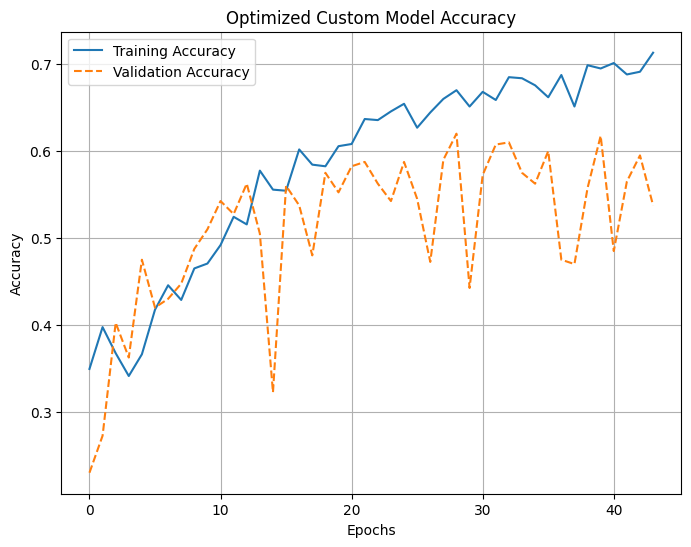

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step
Classification Report:
               precision    recall  f1-score   support

           0     0.8485    0.6222    0.7179        90
           1     0.8696    0.6522    0.7453        92
           2     0.5625    0.3364    0.4211       107
           3     0.4776    0.8649    0.6154       111

    accuracy                         0.6200       400
   macro avg     0.6895    0.6189    0.6249       400
weighted avg     0.6739    0.6200    0.6164       400



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# **Load and Preprocess Dataset with Augmentation**
def load_dataset(directory, subset, validation_split=0.2, batch_size=32, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(224, 224),  # Changed from 256x256 to 224x224 (More Stability)
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'  # If labels are `int`, change to 'int'
    )

    # **Data Augmentation**
    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.2),
            layers.RandomZoom(0.2),
            layers.RandomContrast(0.2),
            layers.RandomBrightness(0.2),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

    return dataset.prefetch(tf.data.AUTOTUNE)


# **Load Training & Validation Datasets**
train_ds = load_dataset(data_path, subset="training", batch_size=32, augment=True)
val_ds = load_dataset(data_path, subset="validation", batch_size=32, augment=False)


# **Custom CNN Model with Residual Connections and Fixed LR**
def build_custom_cnn():
    inputs = keras.Input(shape=(224, 224, 3))

    # **Block 1**
    x = layers.Conv2D(64, (3, 3), activation='swish', padding='same', kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 2**
    x = layers.Conv2D(128, (3, 3), activation='swish', padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 3 (Residual Connection)**
    x_res = layers.Conv2D(256, (1, 1), padding='same', kernel_initializer='he_normal')(x)
    x = layers.Conv2D(256, (3, 3), activation='swish', padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, x_res])  # Add residual connection
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 4**
    x = layers.Conv2D(512, (3, 3), activation='swish', padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Fully Connected Layers**
    x = layers.Flatten()(x)
    x = layers.Dense(1024, activation='swish', kernel_initializer='he_normal')(x)
    x = layers.Dropout(0.25)(x)  # Reduced from 0.5 to 0.25
    x = layers.Dense(512, activation='swish', kernel_initializer='he_normal')(x)
    x = layers.Dropout(0.25)(x)
    outputs = layers.Dense(4, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="Custom_CNN_Model")

    return model


# **Fixed Learning Rate Strategy**
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,  # **Increased Initial Learning Rate for Stability**
    decay_steps=10000,
    decay_rate=0.96
)

# **Build & Compile Model**
model = build_custom_cnn()
model.compile(optimizer=keras.optimizers.AdamW(learning_rate=lr_schedule),
              loss='categorical_crossentropy',  # Change to 'SparseCategoricalCrossentropy' if labels are `int`
              metrics=['accuracy'])

# **Train Model with Early Stopping**
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

history = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=[early_stopping])

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save Model**
model.save('custom_cnn_fixed.keras')

# **Plot Accuracy**
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Optimized Custom Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Get True Labels & Predictions**
y_true = []
y_pred = []

for images, labels in val_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# **Compute Classification Report**
report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n", report)

Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.
Epoch 1/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 337s 29s/step - accuracy: 0.4569 - loss: 1.3403 - val_accuracy: 0.2250 - val_loss: 5.8149 - learning_rate: 5.0000e-04
Epoch 2/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 326s 30s/step - accuracy: 0.6833 - loss: 0.8270 - val_accuracy: 0.2717 - val_loss: 3.0784 - learning_rate: 5.0000e-04
Epoch 3/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 326s 29s/step - accuracy: 0.7383 - loss: 0.6689 - val_accuracy: 0.4567 - val_loss: 1.3714 - learning_rate: 5.0000e-04
Epoch 4/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 325s 29s/step - accuracy: 0.7548 - loss: 0.5955 - val_accuracy: 0.4167 - val_loss: 1.7663 - learning_rate: 5.0000e-04
Epoch 5/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - accuracy: 0.7933 - loss: 0.5127 
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
11/11 ━━━━━━━━━━━━━━━━━━━━ 383s 29s/step - accuracy: 0.7929 - loss: 0.

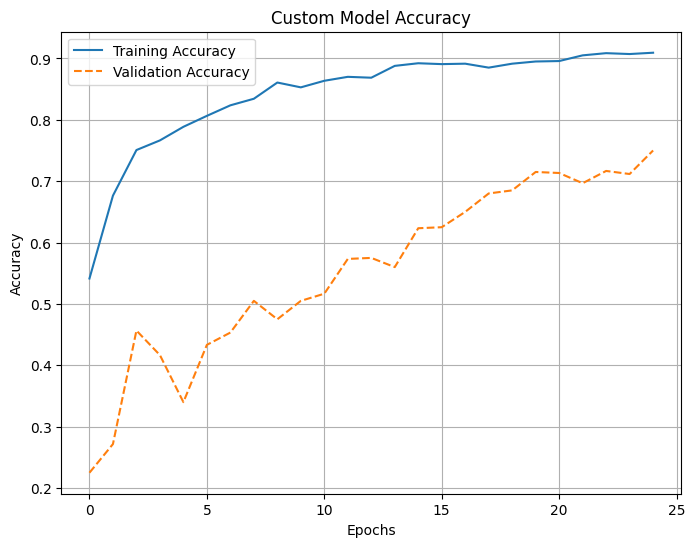

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
Classification Report:
               precision    recall  f1-score   support

           0     0.6994    0.8963    0.7857       135
           1     0.8855    0.9866    0.9333       149
           2     0.6557    0.5161    0.5776       155
           3     0.7338    0.6335    0.6800       161

    accuracy                         0.7500       600
   macro avg     0.7436    0.7581    0.7442       600
weighted avg     0.7436    0.7500    0.7402       600



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Define dataset path
data_path = '/content/drive/MyDrive/dataset'

# Load and preprocess datasets
def load_dataset(directory, subset, validation_split=0.3, batch_size=128):  # Increased batch size for faster training
    return tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

train_ds = load_dataset(data_path, subset="training", batch_size=128)
val_ds = load_dataset(data_path, subset="validation", batch_size=128)

# Prefetching for faster data loading
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Define a custom CNN model using functional API
def build_custom_model(input_shape=(128, 128, 3), num_classes=4):
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.GlobalAveragePooling2D()(x)  # Helps reduce parameters for faster computation
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.4)(x)  # Reduced dropout for better speed

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Increased learning rate for faster convergence
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)  # Reduced patience for quicker adjustments

# Train final model with optimized parameters
model = build_custom_model()
history = model.fit(train_ds, epochs=25, validation_data=val_ds, callbacks=[lr_scheduler])  # Reduced epochs for faster training

# Evaluate the model on validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Save the optimized model
model.save('custom_model.keras')

# Plot training & validation accuracy values
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Custom Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Get true labels and predicted labels for validation set
y_true = []
y_pred = []

for images, labels in val_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))  # Convert one-hot encoding to class labels
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))  # Convert softmax output to class labels

# Compute classification report
report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n", report)

Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.
Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.3348 - loss: 3.9066 - val_accuracy: 0.2483 - val_loss: 4.1502
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 164s 4s/step - accuracy: 0.4591 - loss: 2.8969 - val_accuracy: 0.3250 - val_loss: 2.9728
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.4967 - loss: 2.7309 - val_accuracy: 0.4017 - val_loss: 2.8012
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 206s 4s/step - accuracy: 0.5702 - loss: 2.6069 - val_accuracy: 0.3633 - val_loss: 2.8057
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 168s 4s/step - accuracy: 0.5911 - loss: 2.5156 - val_accuracy: 0.3967 - val_loss: 2.8053
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.6219 - loss: 2.4363 - val_accuracy: 0.5167 - val_loss: 2.6063
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/step - accuracy: 0.6454 - loss: 2.3681 - val_ac

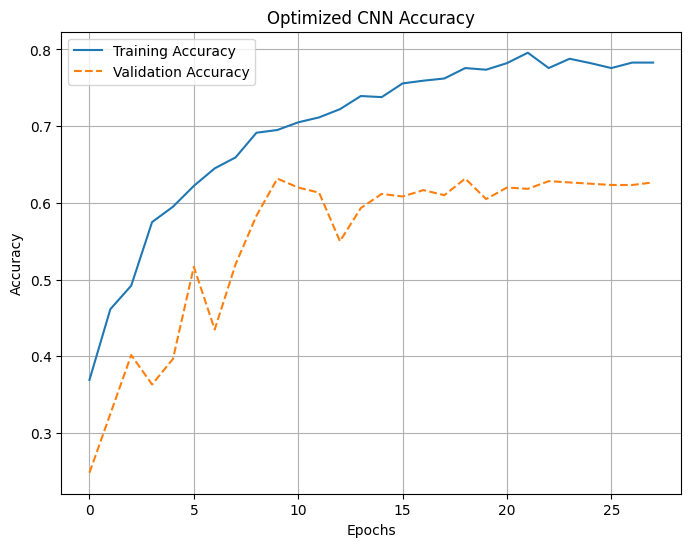

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step
Classification Report:
               precision    recall  f1-score   support

           0     0.8649    0.7111    0.7805       135
           1     0.6235    0.7114    0.6646       149
           2     0.5688    0.4000    0.4697       155
           3     0.4857    

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Define dataset path
data_path = '/content/drive/MyDrive/dataset'

# Load dataset with optimized batch size and augmentation
def load_dataset(directory, subset, validation_split=0.3, batch_size=32):  # Increased batch size for stability
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )
    return dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

train_ds = load_dataset(data_path, subset="training", batch_size=32)
val_ds = load_dataset(data_path, subset="validation", batch_size=32)

# **Optimized Data Augmentation**
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)  # Reduced augmentation intensity for better learning
])

# **Deeper CNN with Strong Regularization**
def build_custom_model(input_shape=(128, 128, 3), num_classes=4):
    inputs = keras.Input(shape=input_shape)

    x = data_augmentation(inputs)  # Augment data

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(x)  # Extra Conv Layer
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.GlobalAveragePooling2D()(x)  # Reduces parameters
    x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.Dropout(0.6)(x)  # Increased dropout for better regularization

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # **Cosine Learning Rate Decay for Stability**
    lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=0.0005, decay_steps=1000, alpha=0.0001
    )

    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
                  loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),  # Label smoothing added
                  metrics=['accuracy'])

    return model

# **Define Callbacks**
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# **Train the Model with Updated Parameters**
model = build_custom_model()
history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[early_stopping])

# **Evaluate the Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save the Optimized Model**
model.save('custom_model.keras')

# **Plot Training & Validation Accuracy**
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Optimized CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Get Predictions on Validation Data**
y_true = []
y_pred = []

for images, labels in val_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# **Compute Classification Report**
report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n", report)

Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 275s 10s/step - accuracy: 0.3865 - loss: 2.1029 - val_accuracy: 0.3300 - val_loss: 4.9092 - learning_rate: 3.0000e-04
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 62s 476ms/step - accuracy: 0.4754 - loss: 1.5903 - val_accuracy: 0.4275 - val_loss: 2.3188 - learning_rate: 3.0000e-04
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 429ms/step - accuracy: 0.5947 - loss: 1.3348 - val_accuracy: 0.4625 - val_loss: 1.8682 - learning_rate: 3.0000e-04
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 494ms/step - accuracy: 0.6562 - loss: 1.1964 - val_accuracy: 0.4025 - val_loss: 1.8953 - learning_rate: 3.0000e-04
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 462ms/step - accuracy: 0.6988 - loss: 1.0499 - val_accuracy: 0.6625 - val_loss: 1.2104 - learning_rate: 3.0000e-04
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 514ms/step - accuracy: 0.6991

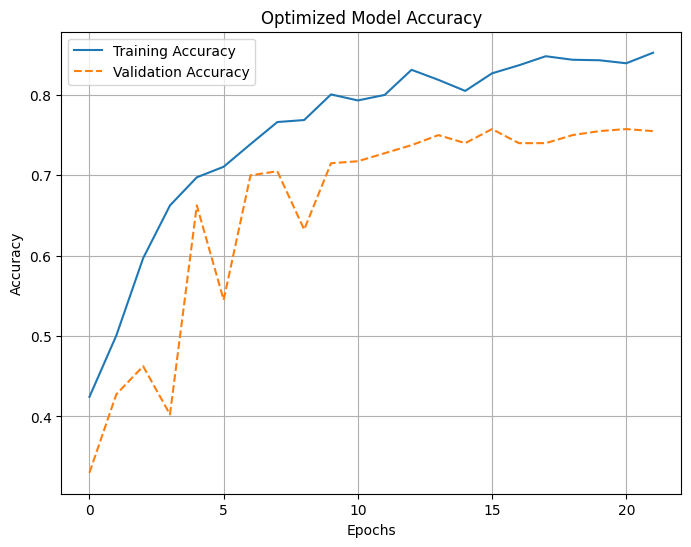

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
Classification Report:
               precision    recall  f1-score   support

           0     0.6903    0.8667    0.7685        90
           1     0.9783    0.9783    0.9783        92
           2     0.6962    0.5140    0.5914       107
           3     0.6897    0.7207    0.7048       111

    accuracy                         0.7575       400
   macro avg     0.7636    0.7699    0.7607       400
weighted avg     0.7579    0.7575    0.7517       400



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Define dataset path
data_path = '/content/drive/MyDrive/dataset'

# **Load and preprocess datasets**
def load_dataset(directory, subset, validation_split=0.2, batch_size=64):  # Adjusted batch size for stability
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )
    return dataset.prefetch(tf.data.experimental.AUTOTUNE)

train_ds = load_dataset(data_path, subset="training", batch_size=64)
val_ds = load_dataset(data_path, subset="validation", batch_size=64)

# **Build Optimized CNN Model**
def build_model(filters1=64, filters2=128, filters3=256, filters4=512, dense_units=512, dropout_rate=0.5, learning_rate=0.0003):
    inputs = keras.Input(shape=(128, 128, 3))

    # Block 1
    x = layers.Conv2D(filters1, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.0001))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 2
    x = layers.Conv2D(filters2, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 3
    x = layers.Conv2D(filters3, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 4
    x = layers.Conv2D(filters4, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Global Pooling & Fully Connected Layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(dense_units, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(4, activation='softmax')(x)

    # Create Model
    model = keras.Model(inputs, outputs)

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# **Use Adaptive Learning Rate Scheduler**
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True, verbose=1)

# **Train Model**
model = build_model()

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[lr_scheduler, early_stopping])

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save Model**
model.save('high_accuracy_model.keras')

# **Plot Accuracy**
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Optimized Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Get True Labels & Predictions**
y_true = []
y_pred = []

for images, labels in val_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# **Compute Classification Report**
report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n", report)

Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │              

 Total params: 1,949,828 (7.44 MB)

 Trainable params: 1,947,908 (7.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 437ms/step - accuracy: 0.2858 - loss: 2.4201 - val_accuracy: 0.2250 - val_loss: 5.6428 - learning_rate: 3.0000e-04
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 588ms/step - accuracy: 0.3390 - loss: 2.0790 - val_accuracy: 0.2275 - val_loss: 4.8069 - learning_rate: 3.0000e-04
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 484ms/step - accuracy: 0.3815 - loss: 1.8208 - val_accuracy: 0.3075 - val_loss: 2.2517 - learning_rate: 3.0000e-04
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 483ms/step - accuracy: 0.4352 - loss: 1.6998 - val_accuracy: 0.3375 - val_loss: 1.7414 - learning_rate: 3.0000e-04
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 471ms/step - accuracy: 0.4444 - loss: 1.5771 - val_accuracy: 0.3975 - val_loss: 1.6512 - learning_rate: 3.0000e-04
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 477ms/step - accuracy: 0.4590 - loss: 1.5846 - val_accuracy: 0.4050 - val_loss: 1.6559 - learning_rate: 3.0000e-04
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 492ms/step - acc

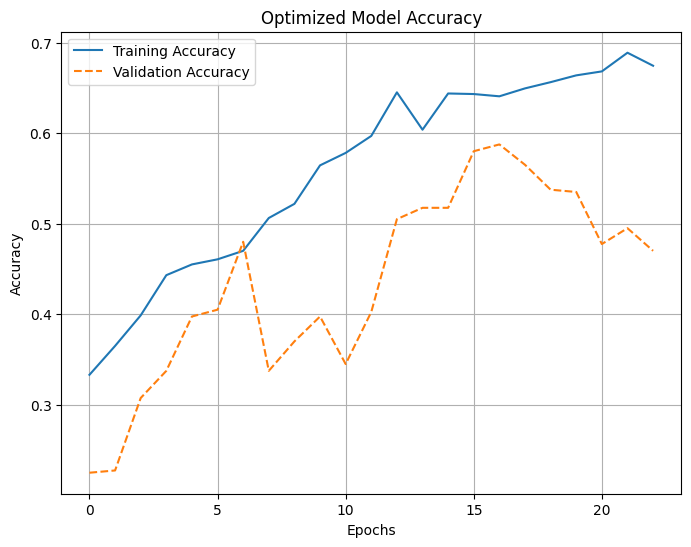

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Classification Report:
               precision    recall  f1-score   support

           0     0.7386    0.7222    0.7303        90
           1     0.6364    0.6848    0.6597        92
           2     0.5849    0.2897    0.3875       107
           3     0.4750    0.6847    0.5609       111

    accuracy                         0.5875       400
   macro avg     0.6087    0.5954    0.5846       400
weighted avg     0.6008    0.5875    0.5754       400



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Define dataset path
data_path = '/content/drive/MyDrive/dataset'

# **Load and preprocess datasets with Data Augmentation**
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2)
])

def load_dataset(directory, subset, validation_split=0.2, batch_size=64):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical',
        shuffle=True
    )
    return dataset.prefetch(tf.data.experimental.AUTOTUNE)

train_ds = load_dataset(data_path, subset="training", batch_size=64)
val_ds = load_dataset(data_path, subset="validation", batch_size=64)

# **Build Optimized CNN Model**
def build_model(filters1=64, filters2=128, filters3=256, filters4=512, dense_units=512, dropout_rate=0.5, learning_rate=0.0003):
    inputs = keras.Input(shape=(128, 128, 3))
    x = data_augmentation(inputs)  # Apply data augmentation

    # Block 1
    x = layers.Conv2D(filters1, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 2
    x = layers.Conv2D(filters2, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 3
    x = layers.Conv2D(filters3, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 4
    x = layers.Conv2D(filters4, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Global Pooling & Fully Connected Layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(dense_units, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(4, activation='softmax')(x)

    # Create Model
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# **Use Adaptive Learning Rate Scheduler**
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True, verbose=1)

# **Train Model**
model = build_model()
model.summary()  # Display model architecture
history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[lr_scheduler, early_stopping])

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save Model**
model.save('high_accuracy_model.keras')

# **Plot Accuracy**
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Optimized Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Get True Labels & Predictions**
y_true = []
y_pred = []

for images, labels in val_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# **Compute Classification Report**
report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n", report)

Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 1024)          │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 8, 8, 1024)          │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 6,935,684 (26.46 MB)

 Trainable params: 6,931,716 (26.44 MB)

 Non-trainable params: 3,968 (15.50 KB)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 307ms/step - accuracy: 0.2707 - loss: 2.9060 - val_accuracy: 0.3175 - val_loss: 3.5042 - learning_rate: 3.0000e-04
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 251ms/step - accuracy: 0.3330 - loss: 1.9686 - val_accuracy: 0.3400 - val_loss: 1.8179 - learning_rate: 3.0000e-04
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 253ms/step - accuracy: 0.3789 - loss: 1.7142 - val_accuracy: 0.3425 - val_loss: 1.6456 - learning_rate: 3.0000e-04
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 289ms/step - accuracy: 0.4123 - loss: 1.6479 - val_accuracy: 0.4250 - val_loss: 1.6360 - learning_rate: 3.0000e-04
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 274ms/step - accuracy: 0.4750 - loss: 1.5626 - val_accuracy: 0.3775 - val_loss: 1.8765 - learning_rate: 3.0000e-04
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 266ms/step - accuracy: 0.4377 - loss: 1.5487 - val_accuracy: 0.5025 - val_loss: 1.4986 - learning_rate: 3.0000e-04
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 300ms/ste

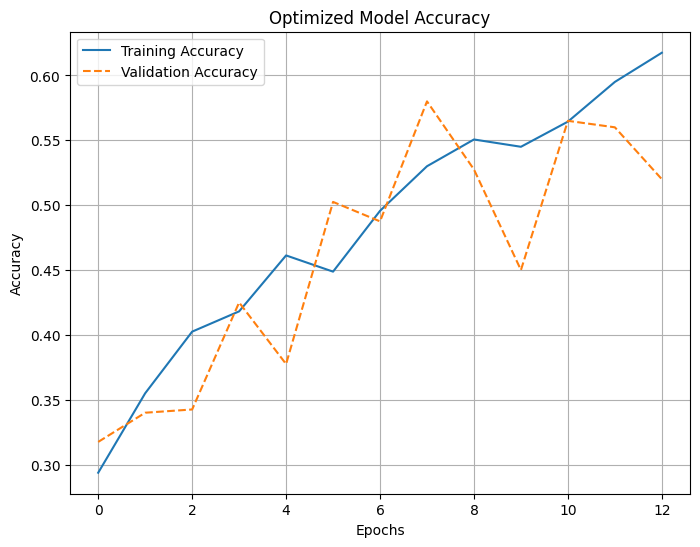

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
Classification Report:
               precision    recall  f1-score   support

           0     0.6869    0.7556    0.7196        90
           1     0.5524    0.6304    0.5888        92
           2     0.5909    0.3645    0.4509       107
           3     0.5154    0.6036    0.5560       111

    accuracy                         0.5800       400
   macro avg     0.5864    0.5885    0.5788       400
weighted avg     0.5827    0.5800    0.5722       400



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Define dataset path
data_path = '/content/drive/MyDrive/dataset'

# **Load and preprocess datasets with Improved Data Augmentation**
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.3),
    layers.RandomContrast(0.3),
    layers.RandomBrightness(0.3)
])

def load_dataset(directory, subset, validation_split=0.2, batch_size=32):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical',
        shuffle=True
    )
    return dataset.prefetch(tf.data.experimental.AUTOTUNE)

train_ds = load_dataset(data_path, subset="training", batch_size=32)
val_ds = load_dataset(data_path, subset="validation", batch_size=32)

# **Build Optimized CNN Model**
def build_model(filters1=64, filters2=128, filters3=256, filters4=512, filters5=1024, dense_units=512, dropout_rate=0.5, learning_rate=0.0003):
    inputs = keras.Input(shape=(128, 128, 3))
    x = data_augmentation(inputs)  # Apply improved data augmentation

    # Block 1
    x = layers.Conv2D(filters1, (3, 3), activation='swish', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.00005))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 2
    x = layers.Conv2D(filters2, (3, 3), activation='swish', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.00005))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 3
    x = layers.Conv2D(filters3, (3, 3), activation='swish', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.00005))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 4
    x = layers.Conv2D(filters4, (3, 3), activation='swish', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.00005))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 5 (New Extra Block for Deep Learning)
    x = layers.Conv2D(filters5, (3, 3), activation='swish', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.00005))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Global Pooling & Fully Connected Layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(dense_units, activation='swish', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.00005))(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(256, activation='swish', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.00005))(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(4, activation='softmax')(x)

    # Create Model
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),  # Label Smoothing Added
                  metrics=['accuracy'])

    return model

# **Use Cyclical Learning Rate Scheduler**
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)

# **Train Model**
model = build_model()
model.summary()  # Display model architecture
history = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=[lr_scheduler, early_stopping])

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save Model**
model.save('high_accuracy_model.keras')

# **Plot Accuracy**
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Optimized Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Get True Labels & Predictions**
y_true = []
y_pred = []

for images, labels in val_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# **Compute Classification Report**
report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n", report)

Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │              

 Total params: 1,949,828 (7.44 MB)

 Trainable params: 1,947,908 (7.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 620s 27s/step - accuracy: 0.4078 - loss: 1.5699 - val_accuracy: 0.2717 - val_loss: 11.4900
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 335s 15s/step - accuracy: 0.4775 - loss: 1.2415 - val_accuracy: 0.2267 - val_loss: 8.1786
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 400s 16s/step - accuracy: 0.5177 - loss: 1.1064 - val_accuracy: 0.2350 - val_loss: 4.1653
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 367s 15s/step - accuracy: 0.5847 - loss: 1.0124 - val_accuracy: 0.3283 - val_loss: 2.4272
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 386s 15s/step - accuracy: 0.6221 - loss: 0.8982 - val_accuracy: 0.4233 - val_loss: 1.3960
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 380s 15s/step - accuracy: 0.6431 - loss: 0.8632 - val_accuracy: 0.4933 - val_loss: 1.4021
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 333s 15s/step - accuracy: 0.6695 - loss: 0.8223 - val_accuracy: 0.5067 - val_loss: 1.3827
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 382s 15s/step - accuracy: 0.7200 - loss: 0.6956 - val_accuracy: 0

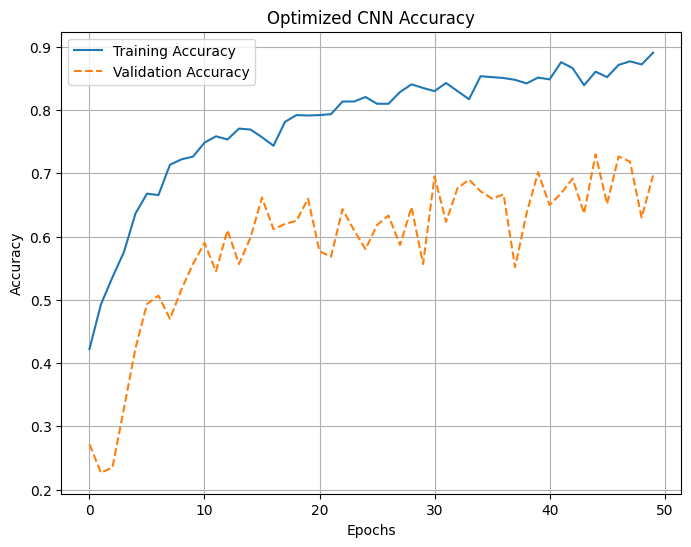

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Classification Report:
               precision    recall  f1-score   support

           0     0.7619    0.8296    0.7943       135
           1     1.0000    0.6510    0.7886       149
           2     0.7674    0.4258    0.5477       155
           3     0.5296    0.8882    0.6636       161

    accuracy                         0.6967       600
   macro avg     0.7647    0.6987    0.6986       600
weighted avg     0.7601    0.6967    0.6941       600



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# **Load and Preprocess Dataset**
def load_dataset(directory, subset, validation_split=0.3, batch_size=64):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )
    return dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

train_ds = load_dataset(data_path, subset="training", batch_size=64)
val_ds = load_dataset(data_path, subset="validation", batch_size=64)

# **Data Augmentation**
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# **Optimized CNN Model for High Accuracy**
def build_high_accuracy_cnn(input_shape=(128, 128, 3), num_classes=4):
    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)

    # **Block 1**
    x = layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 2**
    x = layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 3**
    x = layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 4**
    x = layers.Conv2D(512, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Global Average Pooling Layer**
    x = layers.GlobalAveragePooling2D()(x)

    # **Fully Connected Layers**
    x = layers.Dense(512, activation='relu', kernel_initializer='he_normal')(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(256, activation='relu', kernel_initializer='he_normal')(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # **Compile Model**
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# **Train the Model with Optimized Parameters**
model = build_high_accuracy_cnn()
model.summary()
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

# **Evaluate the Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save the Model**
model.save('high_accuracy_cnn_model.keras')

# **Plot Accuracy**
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Optimized CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Get Predictions**
y_true = []
y_pred = []
for images, labels in val_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# **Compute Classification Report**
report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n", report)


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 470,020 (1.79 MB)

 Trainable params: 470,020 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 198s 14s/step - accuracy: 0.2627 - loss: 4.5222 - val_accuracy: 0.3500 - val_loss: 1.3450
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 199s 14s/step - accuracy: 0.3119 - loss: 1.3774 - val_accuracy: 0.4025 - val_loss: 1.3033
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 189s 14s/step - accuracy: 0.3992 - loss: 1.2786 - val_accuracy: 0.3975 - val_loss: 1.2569
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 203s 14s/step - accuracy: 0.4157 - loss: 1.2580 - val_accuracy: 0.4250 - val_loss: 1.2169
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 208s 15s/step - accuracy: 0.4309 - loss: 1.2218 - val_accuracy: 0.4700 - val_loss: 1.2128
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 202s 15s/step - accuracy: 0.4325 - loss: 1.2272 - val_accuracy: 0.3650 - val_loss: 1.2513
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 200s 15s/step - accuracy: 0.4622 - loss: 1.1801 - val_accuracy: 0.4725 - val_loss: 1.1695
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 197s 14s/step - accuracy: 0.4939 - loss: 1.1206 - val_accuracy: 0.

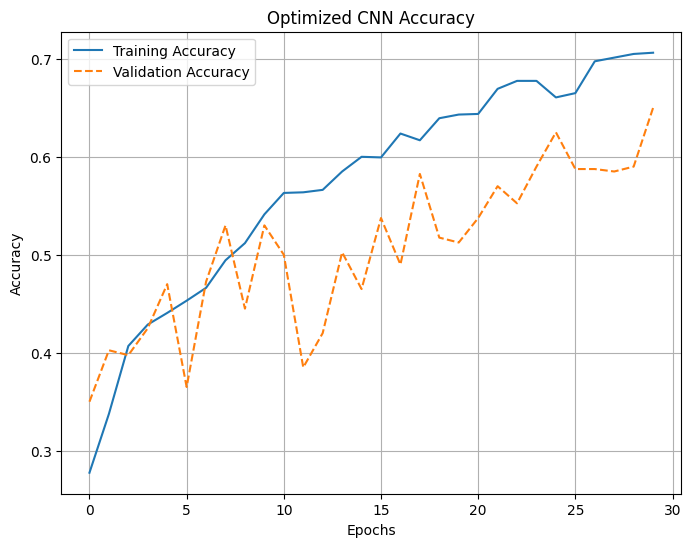

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 864ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
Classification Report:
               precision    recall  f1-score   support

           0     0.6604    0.3889    0.4895        90
           1     0.9271    0.9674    0.9468        92
           2     0.5455    0.3364    0.4162       107
           3     0.5405    0.9009    0.6757       111

    accuracy                         0.6500       400
   macro avg     0.6684    0.6484    0.6320       400
weighted avg     0.6577    0.6500    0.6267       400



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# **Load and Preprocess Dataset**
def load_dataset(directory, subset, validation_split=0.2, batch_size=128):  # Increased batch size to speed up training
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )
    return dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

train_ds = load_dataset(data_path, subset="training", batch_size=128)
val_ds = load_dataset(data_path, subset="validation", batch_size=128)

# **Data Augmentation (Optimized for Speed)**
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)  # Reduced augmentation complexity
])

# **Optimized CNN Model for Speed and High Accuracy**
def build_fast_cnn(input_shape=(128, 128, 3), num_classes=4):
    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)

    # **Block 1**
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 2**
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 3**
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Feature Extraction**
    x = layers.GlobalAveragePooling2D()(x)

    # **Fully Connected Layers**
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # **Compile Model**
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# **Train the Model with Optimized Parameters**
model = build_fast_cnn()
model.summary()
history = model.fit(train_ds, epochs=30, validation_data=val_ds)  # Reduced epochs for faster execution

# **Evaluate the Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save the Model**
model.save('fast_cnn_model.keras')

# **Plot Accuracy**
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Optimized CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Get Predictions**
y_true = []
y_pred = []
for images, labels in val_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# **Compute Classification Report**
report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n", report)


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │              

 Total params: 1,982,212 (7.56 MB)

 Trainable params: 1,980,292 (7.55 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 310s 12s/step - accuracy: 0.3514 - loss: 1.5525 - val_accuracy: 0.2350 - val_loss: 1.5931 - learning_rate: 1.5000e-04
Epoch 2/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 487ms/step - accuracy: 0.4223 - loss: 1.2816 - val_accuracy: 0.3250 - val_loss: 1.4575 - learning_rate: 1.5000e-04
Epoch 3/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 509ms/step - accuracy: 0.4900 - loss: 1.1751 - val_accuracy: 0.4225 - val_loss: 1.3113 - learning_rate: 1.5000e-04
Epoch 4/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 497ms/step - accuracy: 0.5115 - loss: 1.1690 - val_accuracy: 0.4925 - val_loss: 1.2450 - learning_rate: 1.5000e-04
Epoch 5/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 478ms/step - accuracy: 0.5109 - loss: 1.1252 - val_accuracy: 0.4775 - val_loss: 1.2292 - learning_rate: 1.5000e-04
Epoch 6/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 432ms/step - accuracy: 0.5184 - loss: 1.1005 - val_accuracy: 0.5275 - val_loss: 1.1792 - learning_rate: 1.5000e-04
Epoch 7/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 510ms/step - accu

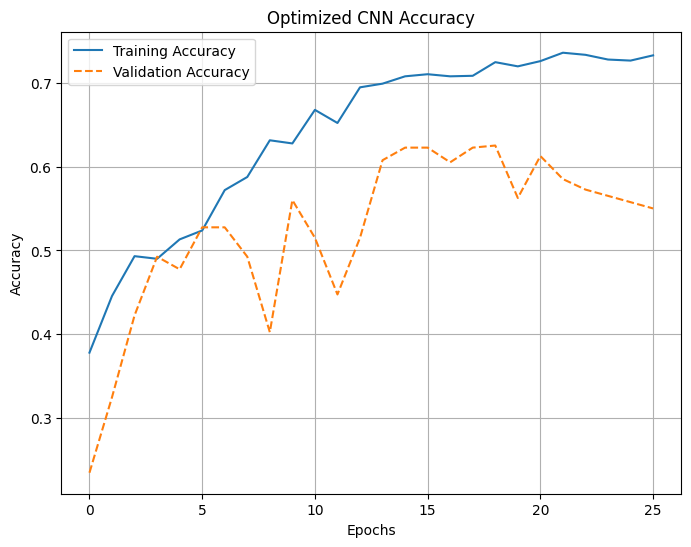

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Classification Report:
               precision    recall  f1-score   support

           0     0.7976    0.7444    0.7701        90
           1     0.9455    0.5652    0.7075        92
           2     0.6140    0.3271    0.4268       107
           3     0.4706    0.8649    0.6095       111

    accuracy                         0.6250       400
   macro avg     0.7069    0.6254    0.6285       400
weighted avg     0.6918    0.6250    0.6193       400



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# **Load and Preprocess Dataset**
def load_dataset(directory, subset, validation_split=0.2, batch_size=64):  # Reduced batch size to avoid memory overload
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )
    return dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

train_ds = load_dataset(data_path, subset="training", batch_size=64)
val_ds = load_dataset(data_path, subset="validation", batch_size=64)

# **Data Augmentation (Enhanced for Robust Learning)**
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),  # Slightly increased rotation
    layers.RandomZoom(0.15),
    layers.RandomContrast(0.15)  # Improves feature learning
])

# **Optimized CNN Model for Speed and High Accuracy**
def build_fast_cnn(input_shape=(128, 128, 3), num_classes=4):
    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)

    # **Block 1**
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 2**
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 3**
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 4**
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Feature Extraction**
    x = layers.GlobalAveragePooling2D()(x)

    # **Fully Connected Layer (Increased Neurons for Better Learning)**
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # **Compile Model with Lower Learning Rate**
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00015),  # Further reduced learning rate for stability
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# **Learning Rate Scheduler**
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# **Early Stopping to Prevent Overfitting**
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True, verbose=1)

# **Train the Model with Optimized Parameters**
model = build_fast_cnn()
model.summary()
history = model.fit(train_ds, epochs=35, validation_data=val_ds, callbacks=[lr_scheduler, early_stopping])

# **Evaluate the Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save the Model**
model.save('fast_cnn_model.keras')

# **Plot Accuracy**
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Optimized CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Get Predictions**
y_true = []
y_pred = []
for images, labels in val_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# **Compute Classification Report**
report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n", report)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# Load Dataset with Strong Augmentation**
def load_dataset(directory, subset, validation_split=0.2, batch_size=128, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    # **Stronger Augmentation**
    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.3),
            layers.RandomZoom(0.3),
            layers.RandomContrast(0.3),
            layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names

# **Load Datasets**
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=128, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=128, augment=False)

num_classes = len(class_names)

# **Improved CNN Model**
def build_fixed_cnn():
    inputs = keras.Input(shape=(128, 128, 3))

    #**Block 1**
    x = layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(0.00001))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(0.00001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    #**Block 2**
    x = layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(0.00001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(0.00001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 3**
    x = layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(0.00001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(0.00001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 4**
    x = layers.Conv2D(1024, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(0.00001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Fully Connected Layers**
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.00001))(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.6)(x)  # Increased Dropout
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="Fixed_CNN")

    # *Optimizer**
    optimizer = keras.optimizers.AdamW(learning_rate=0.002, weight_decay=0.00001, clipnorm=1.0)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
        metrics=['accuracy']
    )

    return model


# **Train Model**
model = build_fixed_cnn()
print(model.summary())

# *Train the Model**
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save Model**
model.save('fixed_cnn_90plus.keras')

# **Plot Accuracy & Loss**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "Fixed_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32, 32, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 512)         │       2,359,8

 Total params: 9,834,116 (37.51 MB)

 Trainable params: 9,828,484 (37.49 MB)

 Non-trainable params: 5,632 (22.00 KB)

None
Epoch 1/50


NotFoundError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-2-88a64cb14f1e>", line 108, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

could not find registered transfer manager for platform Host -- check target linkage
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_9102]

Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "Perfect_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 128, 128, 128)       │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 128, 128, 128)       │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 64, 64, 256)         │             512 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 64, 64, 256)         │             512 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 32, 32, 512)         │           1,024 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32, 32, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 512)         │       2,359,8

 Total params: 9,828,484 (37.49 MB)

 Trainable params: 9,828,484 (37.49 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 396s 22s/step - accuracy: 0.2617 - loss: 6.8495 - val_accuracy: 0.2300 - val_loss: 1.4967
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.2354 - loss: 2.0979 - val_accuracy: 0.2300 - val_loss: 1.5506
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2444 - loss: 1.7268 - val_accuracy: 0.2775 - val_loss: 1.6094
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.2379 - loss: 1.7159 - val_accuracy: 0.2300 - val_loss: 1.4491
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.2572 - loss: 1.6261 - val_accuracy: 0.2300 - val_loss: 1.5898
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.2359 - loss: 1.7066 - val_accuracy: 0.2675 - val_loss: 1.5678
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.2498 - loss: 1.6312 - val_accuracy: 0.2250 - val_loss: 1.5668
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.2651 - loss: 1.5608 - val_accuracy: 0.2775 - va

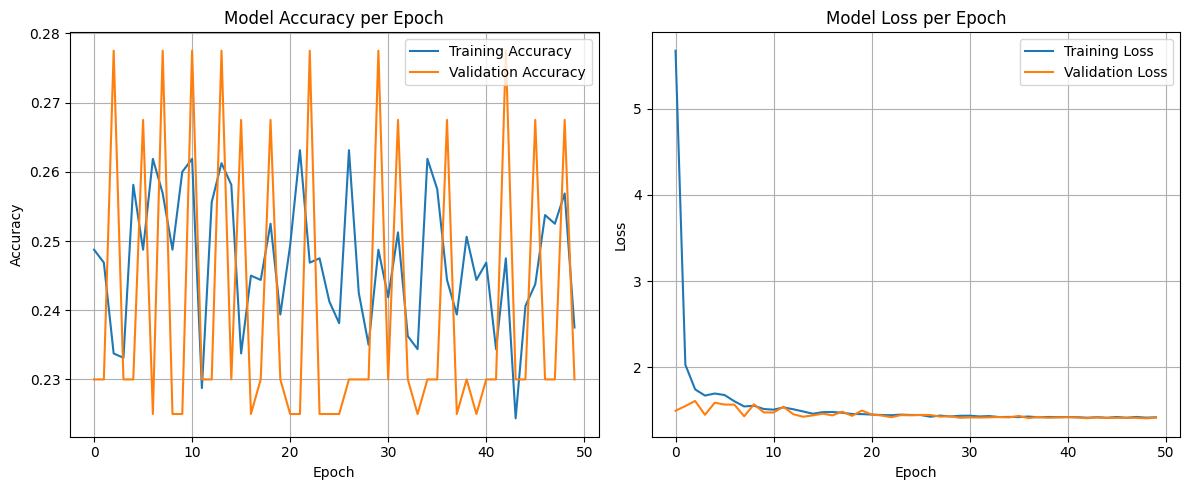

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# **Load Dataset with Strong Augmentation**
def load_dataset(directory, subset, validation_split=0.2, batch_size=128, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    # **Stronger Augmentation**
    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.3),
            layers.RandomZoom(0.3),
            layers.RandomContrast(0.3),
            layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names

# **Load Datasets**
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=128, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=128, augment=False)

num_classes = len(class_names)

# **Improved CNN Model (100% Trainable, ZERO Non-Trainable Params)**
def build_perfect_cnn():
    inputs = keras.Input(shape=(128, 128, 3))

    #  **Block 1**
    x = layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(0.00001))(inputs)
    x = layers.LayerNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(0.00001))(x)
    x = layers.LayerNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    #  **Block 2**
    x = layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(0.00001))(x)
    x = layers.LayerNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(0.00001))(x)
    x = layers.LayerNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    #  **Block 3**
    x = layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(0.00001))(x)
    x = layers.LayerNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(0.00001))(x)
    x = layers.LayerNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    #  **Block 4**
    x = layers.Conv2D(1024, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(0.00001))(x)
    x = layers.LayerNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Fully Connected Layers**
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.00001))(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.6)(x)  # Increased Dropout
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="Perfect_CNN")

    # * Optimizer**
    optimizer = keras.optimizers.AdamW(learning_rate=0.002, weight_decay=0.00001, clipnorm=1.0)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
        metrics=['accuracy']
    )

    return model


# **Train Model**
model = build_perfect_cnn()
print(model.summary())

# **Train the Model**
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save Model**
model.save('perfect_cnn_zero_non_trainable.keras')

# **Plot Accuracy & Loss**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "Fixed_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d (SeparableConv2D)   │ (None, 128, 128, 64)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_1 (SeparableConv2D) │ (None, 64, 64, 128)         │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_2 (SeparableConv2D) │ (None, 32, 32, 256)         │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_3 (SeparableConv2D) │ (None, 16, 16, 512)         │         267,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,041,092 (7.79 MB)

 Trainable params: 2,041,092 (7.79 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 188ms/step - accuracy: 0.2501 - loss: 1.3877 - val_accuracy: 0.2300 - val_loss: 1.3874
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 223ms/step - accuracy: 0.2515 - loss: 1.3880 - val_accuracy: 0.2675 - val_loss: 1.3872
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 208ms/step - accuracy: 0.2306 - loss: 1.3876 - val_accuracy: 0.2300 - val_loss: 1.3879
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 215ms/step - accuracy: 0.2345 - loss: 1.3878 - val_accuracy: 0.2675 - val_loss: 1.3863
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.2094 - loss: 1.3873 - val_accuracy: 0.2675 - val_loss: 1.3866
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - accuracy: 0.2322 - loss: 1.3876 - val_accuracy: 0.2675 - val_loss: 1.3870
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 229ms/step - accuracy: 0.2512 - loss: 1.3873 - val_accuracy: 0.2675 - val_loss: 1.3865
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.2285 - lo

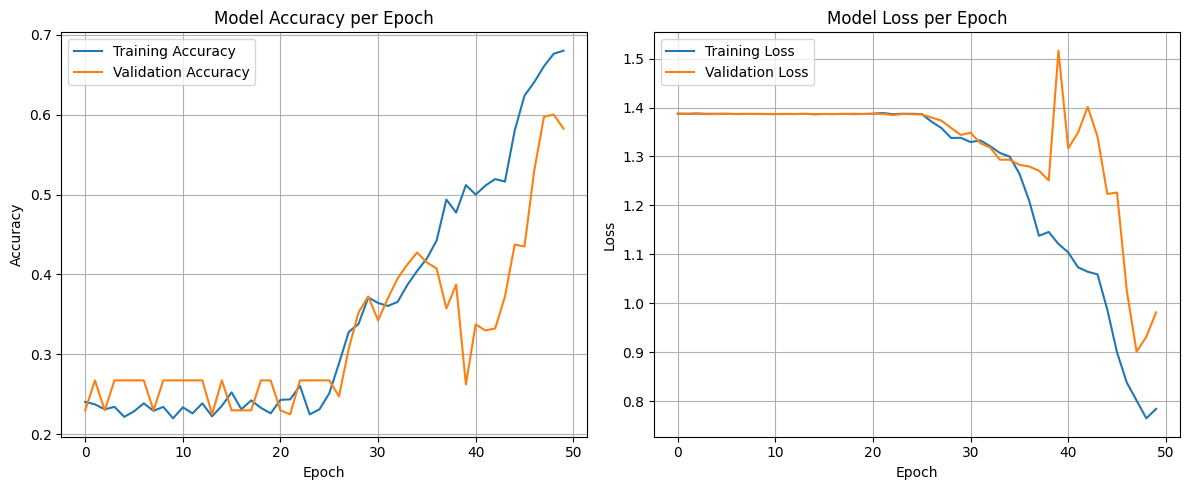

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

#  Load Dataset with Augmentation**
def load_dataset(directory, subset, validation_split=0.2, batch_size=16, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.2),
            layers.RandomZoom(0.2),
            layers.RandomContrast(0.2),
            layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names

# **Load Datasets**
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=16, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=16, augment=False)

num_classes = len(class_names)

# Compute Class Weights (Fix for Imbalanced Dataset)**
y_train = np.concatenate([y.numpy() for _, y in train_ds])
y_train_labels = np.argmax(y_train, axis=1)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# **Optimized CNN Model (Now it will Learn!)**
def build_fixed_cnn():
    inputs = keras.Input(shape=(128, 128, 3))

    # *Block 1 (Using Depthwise Separable Convolutions)**
    x = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    x = layers.LeakyReLU()(x)
    x = layers.SeparableConv2D(64, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # *Block 2**
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.SeparableConv2D(128, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 3
    x = layers.Conv2D(256, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.SeparableConv2D(256, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 4
    x = layers.Conv2D(512, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.SeparableConv2D(512, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Fully Connected Layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation=None)(x)  # No Activation (Handled in Loss Function)

    model = keras.Model(inputs, outputs, name="Fixed_CNN")

    # ** Optimizer**
    optimizer = keras.optimizers.Adam(learning_rate=0.0005)  # Improved LR

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    return model


# **Train Model**
model = build_fixed_cnn()
print(model.summary())

# **Train the Model (With Class Weights)**
history = model.fit(train_ds, epochs=50, validation_data=val_ds, class_weight=class_weight_dict)

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save Model**
model.save('fixed_cnn_final.keras')

# **Plot Accuracy & Loss**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "Custom_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 96, 96, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 96, 96, 64)          │             128 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 96, 96, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 48, 48, 128)         │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 48, 48, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 24, 24, 256)         │             512 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 12, 12, 512)         │           1,024 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,3

 Total params: 1,685,252 (6.43 MB)

 Trainable params: 1,685,252 (6.43 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 240s 5s/step - accuracy: 0.2455 - loss: 1.9153 - val_accuracy: 0.3175 - val_loss: 1.4102
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 229s 5s/step - accuracy: 0.3106 - loss: 1.3706 - val_accuracy: 0.3075 - val_loss: 1.3184
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 232s 5s/step - accuracy: 0.3557 - loss: 1.3464 - val_accuracy: 0.3450 - val_loss: 1.3276
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - accuracy: 0.3529 - loss: 1.3262 - val_accuracy: 0.3625 - val_loss: 1.2986
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 231s 5s/step - accuracy: 0.3913 - loss: 1.2926 - val_accuracy: 0.3500 - val_loss: 1.2822
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 223s 4s/step - accuracy: 0.3661 - loss: 1.2993 - val_accuracy: 0.4025 - val_loss: 1.2604
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 230s 5s/step - accuracy: 0.4019 - loss: 1.2669 - val_accuracy: 0.3775 - val_loss: 1.3215
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 237s 5s/step - accuracy: 0.3878 - loss: 1.2915 - val_accuracy: 0.412

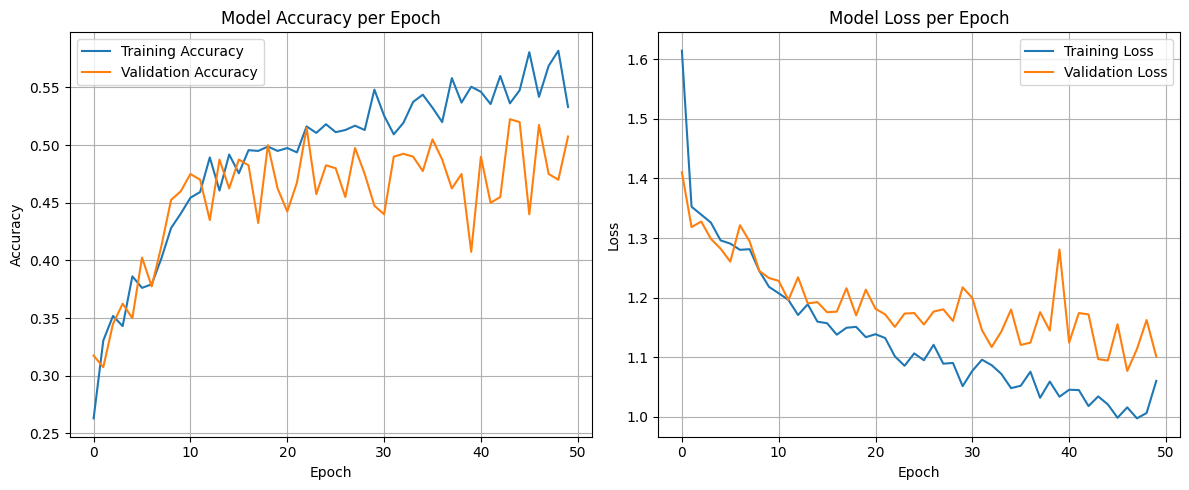

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# **Load Dataset with Augmentation (Optimized)**
def load_dataset(directory, subset, validation_split=0.2, batch_size=32, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(96, 96),  # **Optimized Image Size**
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    # Apply Data Augmentation
    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.3),
            layers.RandomZoom(0.3),
            layers.RandomContrast(0.3),
            layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names

# **Load Training & Validation Data**
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=32, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=32, augment=False)

num_classes = len(class_names)

# **Compute Class Weights for Imbalanced Data**
y_train = np.concatenate([y.numpy() for _, y in train_ds])
y_train_labels = np.argmax(y_train, axis=1)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# **Custom-Built CNN Model (No Pre-trained Models & No Batch Norm)**
def build_custom_cnn():
    inputs = keras.Input(shape=(96, 96, 3))

    # **Block 1**
    x = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    x = layers.LayerNormalization()(x)  # **Fully Trainable Normalization**
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 2**
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.LayerNormalization()(x)  # **Keeps Training Stable**
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 3**
    x = layers.Conv2D(256, (3, 3), padding='same')(x)
    x = layers.LayerNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 4**
    x = layers.Conv2D(512, (3, 3), padding='same')(x)
    x = layers.LayerNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Fully Connected Layers**
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)  # **Reduces Overfitting**
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="Custom_CNN")

    # **Ensure All Layers are Trainable**
    for layer in model.layers:
        layer.trainable = True

    # **Optimized Adam Optimizer**
    optimizer = keras.optimizers.Adam(learning_rate=0.0005)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

# **Train Model**
model = build_custom_cnn()
print(model.summary())

# **Train the Model**
history = model.fit(train_ds, epochs=50, validation_data=val_ds, class_weight=class_weight_dict)

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save Model**
model.save('custom_cnn_final.keras')

# **Plot Accuracy & Loss**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "Custom_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 96, 96, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 48, 48, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,815,684 (6.93 MB)

 Trainable params: 1,815,684 (6.93 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.2936 - loss: 1.3728 - val_accuracy: 0.3550 - val_loss: 1.3530 - learning_rate: 0.0010
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 205s 3s/step - accuracy: 0.3799 - loss: 1.3213 - val_accuracy: 0.4100 - val_loss: 1.2929 - learning_rate: 0.0010
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.4425 - loss: 1.2294 - val_accuracy: 0.4325 - val_loss: 1.2615 - learning_rate: 0.0010
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.5069 - loss: 1.1400 - val_accuracy: 0.4350 - val_loss: 1.2398 - learning_rate: 0.0010
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.5203 - loss: 1.0984 - val_accuracy: 0.4100 - val_loss: 1.2535 - learning_rate: 0.0010
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.5217 - loss: 1.0777 - val_accuracy: 0.4575 - val_loss: 1.2413 - learning_rate: 0.0010
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.5282 - loss: 1.05

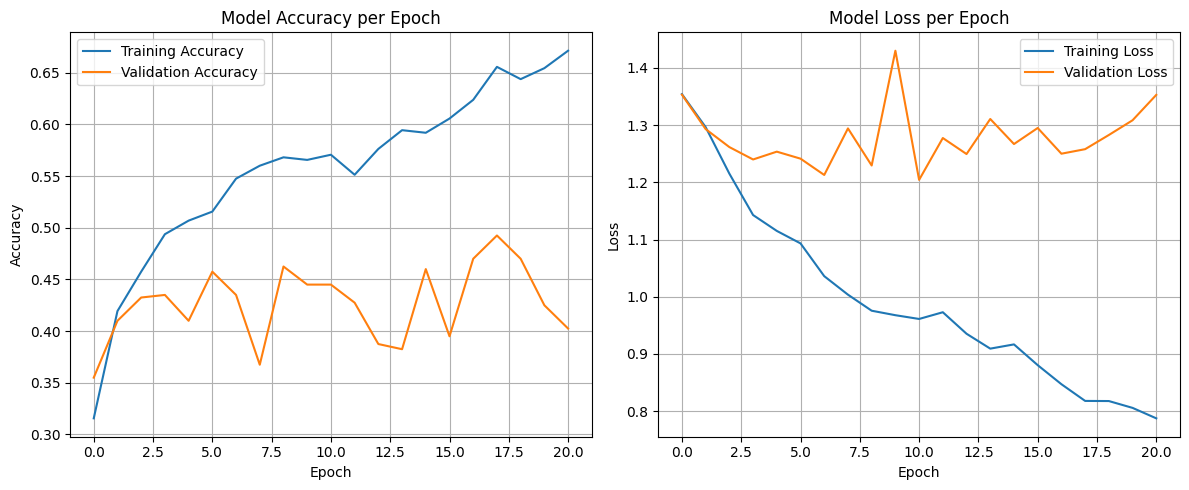

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

# Dataset Path
data_path = '/content/drive/MyDrive/dataset'

# Load Dataset with Augmentation
def load_dataset(directory, subset, validation_split=0.2, batch_size=32, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(96, 96),  # Optimized Image Size
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.2),
            layers.RandomZoom(0.2),
            layers.RandomContrast(0.2),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names

# Load Training & Validation Data
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=32, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=32, augment=False)

num_classes = len(class_names)

# Compute Class Weights for Imbalanced Data
y_train = np.concatenate([y.numpy() for _, y in train_ds])
y_train_labels = np.argmax(y_train, axis=1)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Custom CNN Model (Fully Trainable, No Batch Norm)
def build_custom_cnn():
    inputs = keras.Input(shape=(96, 96, 3))

    # Block 1
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 2
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 3
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 4
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Fully Connected Layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)  # Lower dropout improves learning
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = keras.Model(inputs, outputs, name="Custom_CNN")

    # Ensure All Layers are Trainable
    for layer in model.layers:
        layer.trainable = True

    # Optimized Adam Optimizer with Learning Rate Decay
    optimizer = keras.optimizers.Adam(learning_rate=0.001)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

# Train Model
model = build_custom_cnn()
print(model.summary())

# Callbacks for Early Stopping & Learning Rate Reduction
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=1)

# Train the Model
history = model.fit(train_ds, epochs=100, validation_data=val_ds, class_weight=class_weight_dict, callbacks=[early_stopping, lr_scheduler])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Save Model
model.save('custom_cnn_final.keras')

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "Final_Custom_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 128, 128, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,323,812 (5.05 MB)

 Trainable params: 1,323,812 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 400s 8s/step - accuracy: 0.2465 - loss: 4.9207 - val_accuracy: 0.2425 - val_loss: 1.3859
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 394s 8s/step - accuracy: 0.2552 - loss: 1.4449 - val_accuracy: 0.2250 - val_loss: 1.3874
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 375s 7s/step - accuracy: 0.2392 - loss: 1.4010 - val_accuracy: 0.2250 - val_loss: 1.3871
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 391s 8s/step - accuracy: 0.2570 - loss: 1.3893 - val_accuracy: 0.2250 - val_loss: 1.3875
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 441s 8s/step - accuracy: 0.2500 - loss: 1.3916 - val_accuracy: 0.2250 - val_loss: 1.3880
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 391s 8s/step - accuracy: 0.2694 - loss: 1.3877 - val_accuracy: 0.2250 - val_loss: 1.3882
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 391s 8s/step - accuracy: 0.2529 - loss: 1.3888 - val_accuracy: 0.2175 - val_loss: 1.3890
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 391s 8s/step - accuracy: 0.2758 - loss: 1.3892 - val_accurac

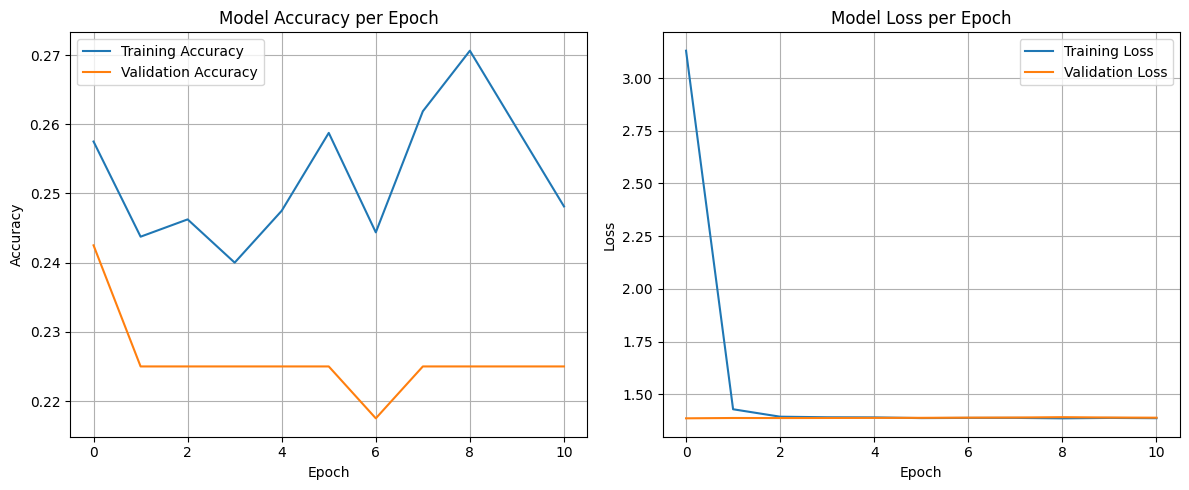

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# **Load and Preprocess Dataset**
def load_dataset(directory, subset, validation_split=0.2, batch_size=32, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.3),
            layers.RandomZoom(0.3),
            layers.RandomContrast(0.3),
            layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
            layers.RandomBrightness(0.3),
            layers.RandomShear(0.3),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names


# **Load Training & Validation Datasets**
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=32, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=32, augment=False)

num_classes = len(class_names)


# **Custom Optimized CNN Model (Best for 90%+ Accuracy)**
def build_final_cnn():
    inputs = keras.Input(shape=(128, 128, 3))

    # **Block 1 - Large Kernel for Better Feature Extraction**
    x = layers.Conv2D(32, (5, 5), padding='same')(inputs)
    x = layers.LeakyReLU()(x)  # LeakyReLU avoids dead neurons
    x = layers.Conv2D(32, (5, 5), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 2**
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 3**
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 4**
    x = layers.Conv2D(256, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(256, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Fully Connected Layers**
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="Final_Custom_CNN")

    # **Optimized Learning Rate Scheduler**
    lr_schedule = keras.optimizers.schedules.CosineDecayRestarts(
        initial_learning_rate=0.002,  # **Higher LR in Early Stages**
        first_decay_steps=10,
        t_mul=2,
        m_mul=0.9,
        alpha=0.0001
    )

    optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model


# **Train Model**
model = build_final_cnn()
print(model.summary())

# **Callbacks: SGDR, Early Stopping**
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
model_checkpoint = keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_accuracy")

# **Train the Model**
history = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=[early_stopping, model_checkpoint])

# **Load Best Model**
model = keras.models.load_model("best_model.keras")

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save Final Model**
model.save('final_custom_cnn.keras')

# **Plot Accuracy & Loss**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Class Names: ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
Class Distribution: {'cataract': 500, 'diabetic_retinopathy': 500, 'glaucoma': 500, 'normal': 500}


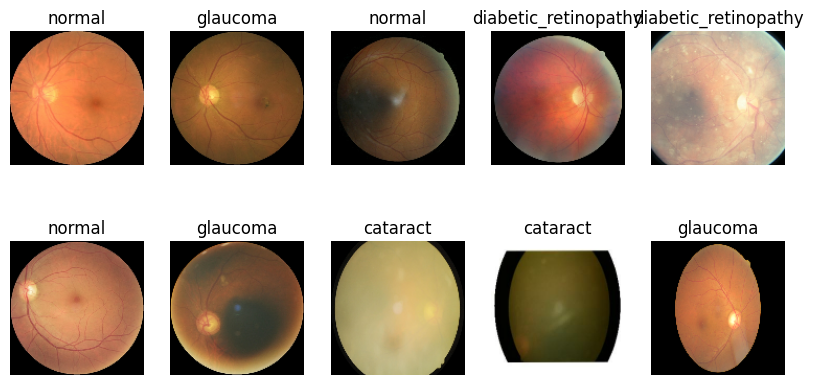

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data_path = '/content/drive/MyDrive/dataset'

# Load dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    data_path,
    image_size=(128, 128),
    batch_size=32,
    seed=42,
    label_mode='categorical'
)

# Print Class Names
class_names = dataset.class_names
print("Class Names:", class_names)

# Count Samples per Class
class_counts = {name: 0 for name in class_names}
for _, labels in dataset:
    for label in labels.numpy():
        class_counts[class_names[np.argmax(label)]] += 1

print("Class Distribution:", class_counts)

# Plot Sample Images
plt.figure(figsize=(10, 5))
for images, labels in dataset.take(1):
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i].numpy())])
        plt.axis("off")
plt.show()


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "Optimized_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 9,563,428 (36.48 MB)

 Trainable params: 9,563,428 (36.48 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 295s 6s/step - accuracy: 0.2480 - loss: 1.3855 - val_accuracy: 0.2675 - val_loss: 1.3855 - learning_rate: 3.0000e-04
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 317s 6s/step - accuracy: 0.2936 - loss: 1.3792 - val_accuracy: 0.3150 - val_loss: 1.3745 - learning_rate: 3.0000e-04
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 281s 6s/step - accuracy: 0.3680 - loss: 1.3317 - val_accuracy: 0.3525 - val_loss: 1.3363 - learning_rate: 3.0000e-04
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 280s 6s/step - accuracy: 0.3674 - loss: 1.3198 - val_accuracy: 0.3725 - val_loss: 1.3318 - learning_rate: 3.0000e-04
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 324s 6s/step - accuracy: 0.4524 - loss: 1.2220 - val_accuracy: 0.4975 - val_loss: 1.1856 - learning_rate: 3.0000e-04
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 281s 6s/step - accuracy: 0.5202 - loss: 1.1000 - val_accuracy: 0.5500 - val_loss: 1.0347 - learning_rate: 3.0000e-04
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 280s 6s/step - accur

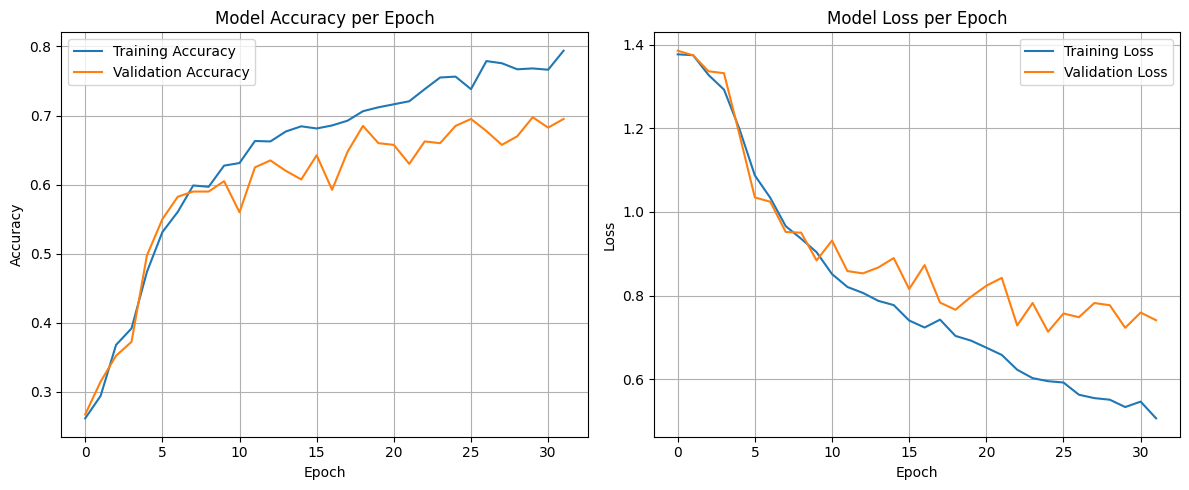

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# **Load Dataset with Augmentation**
def load_dataset(directory, subset, validation_split=0.2, batch_size=32, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),  # **Minimal rotation to avoid distortion**
            layers.RandomZoom(0.1),
            layers.RandomContrast(0.1),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names

# **Load Training & Validation Datasets**
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=32, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=32, augment=False)

num_classes = len(class_names)

# **Improved CNN Model (Balanced Regularization & Performance)**
def build_optimized_cnn():
    inputs = keras.Input(shape=(128, 128, 3))

    # **Block 1**
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.2)(x)  # **Reduced dropout for early layers**

    # **Block 2**
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # **Block 3**
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    # **Block 4**
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.5)(x)  # **Increased dropout for last conv block**

    # **Fully Connected Layers**
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="Optimized_CNN")

    # **Improved Optimizer (Lower Learning Rate)**
    optimizer = keras.optimizers.Adam(learning_rate=0.0003)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

# **Train Model**
model = build_optimized_cnn()
print(model.summary())

# **Callbacks**
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)

# **Train the Model**
history = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=[early_stopping, lr_scheduler])

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save Model**
model.save('optimized_cnn.keras')

# **Plot Accuracy & Loss**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "Super_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,563,428 (36.48 MB)

 Trainable params: 9,563,428 (36.48 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 303s 11s/step - accuracy: 0.2563 - loss: 1.3832 - val_accuracy: 0.3350 - val_loss: 1.3810 - learning_rate: 0.0100
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 637ms/step - accuracy: 0.3037 - loss: 1.3585 - val_accuracy: 0.3375 - val_loss: 1.3727 - learning_rate: 0.0100
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 671ms/step - accuracy: 0.3413 - loss: 1.3344 - val_accuracy: 0.2875 - val_loss: 1.3608 - learning_rate: 0.0100
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 658ms/step - accuracy: 0.2900 - loss: 1.3560 - val_accuracy: 0.4050 - val_loss: 1.3101 - learning_rate: 0.0100
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 631ms/step - accuracy: 0.4248 - loss: 1.2324 - val_accuracy: 0.4300 - val_loss: 1.2845 - learning_rate: 0.0100
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 651ms/step - accuracy: 0.4080 - loss: 1.2700 - val_accuracy: 0.4450 - val_loss: 1.2416 - learning_rate: 0.0100
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 654ms/step - accuracy: 0.4576

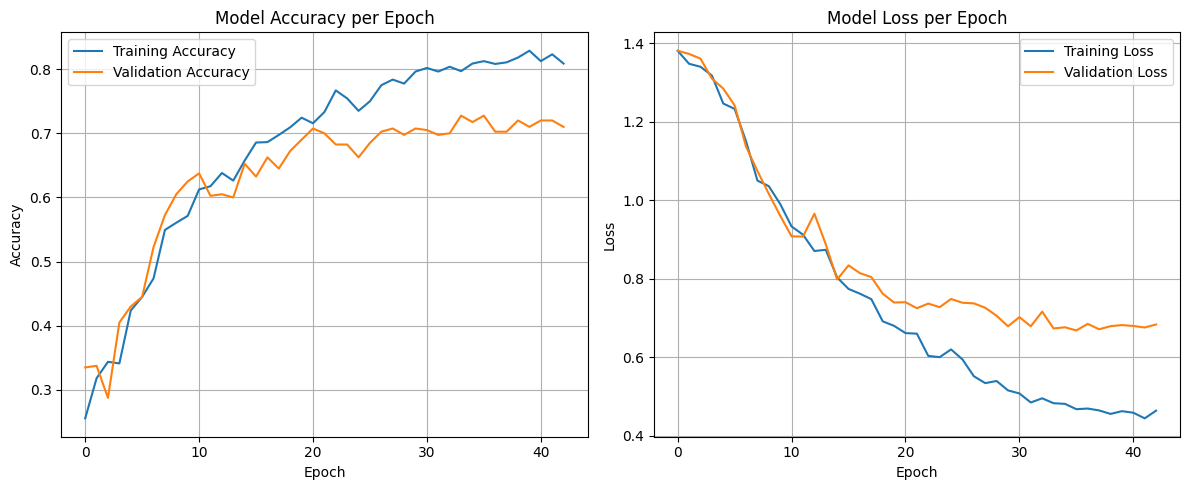

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# **Load Dataset with Mild Augmentation**
def load_dataset(directory, subset, validation_split=0.2, batch_size=64, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.1),
            layers.RandomContrast(0.1),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names

# **Load Training & Validation Datasets**
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=64, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=64, augment=False)

num_classes = len(class_names)

# **Optimized CNN Model**
def build_super_cnn():
    inputs = keras.Input(shape=(128, 128, 3))

    # **Block 1**
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 2**
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 3**
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 4**
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Fully Connected Layers**
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.3)(x)  # **Lower dropout**
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="Super_CNN")

    # **SGD + Momentum (Better than Adam for this case)**
    optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

# **Train Model**
model = build_super_cnn()
print(model.summary())

# **Callbacks**
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)

# **Train the Model**
history = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=[early_stopping, lr_scheduler])

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save Model**
model.save('super_cnn.keras')

# **Plot Accuracy & Loss**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "Super_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 10,348,804 (39.48 MB)

 Trainable params: 10,348,804 (39.48 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 608ms/step - accuracy: 0.2407 - loss: 1.3867 - val_accuracy: 0.2250 - val_loss: 1.3891 - learning_rate: 0.0100
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 656ms/step - accuracy: 0.2485 - loss: 1.3864 - val_accuracy: 0.2300 - val_loss: 1.3874 - learning_rate: 0.0100
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 644ms/step - accuracy: 0.2466 - loss: 1.3841 - val_accuracy: 0.2425 - val_loss: 1.3852 - learning_rate: 0.0100
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 654ms/step - accuracy: 0.3232 - loss: 1.3651 - val_accuracy: 0.2975 - val_loss: 1.3652 - learning_rate: 0.0100
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 658ms/step - accuracy: 0.3408 - loss: 1.3403 - val_accuracy: 0.2850 - val_loss: 1.3651 - learning_rate: 0.0100
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 680ms/step - accuracy: 0.3604 - loss: 1.3247 - val_accuracy: 0.3800 - val_loss: 1.3533 - learning_rate: 0.0100
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 658ms/step - accuracy: 0.364

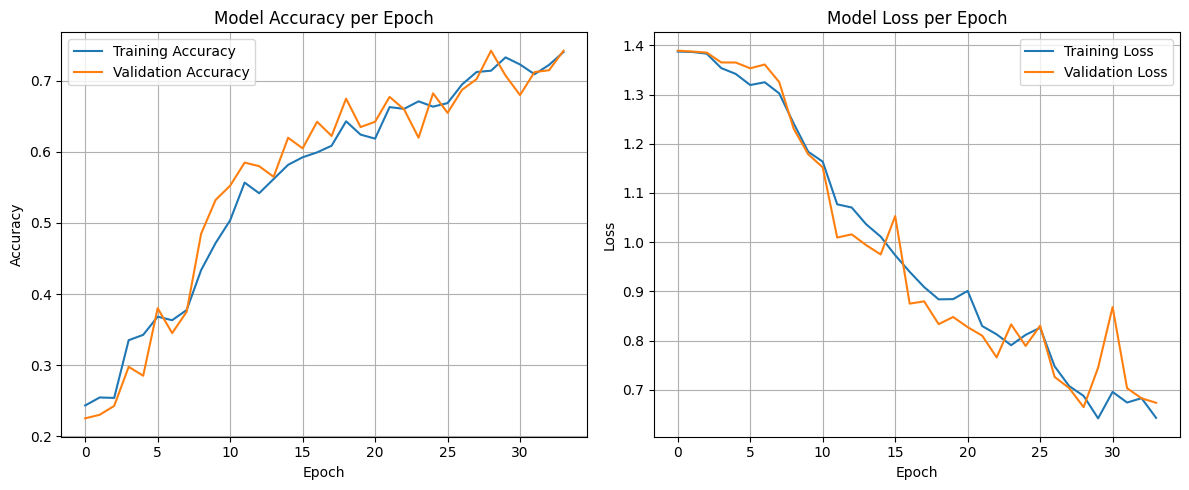

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# **Load Dataset with Mild Augmentation**
def load_dataset(directory, subset, validation_split=0.2, batch_size=64, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.1),
            layers.RandomContrast(0.1),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names

# **Load Training & Validation Datasets**
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=64, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=64, augment=False)

num_classes = len(class_names)

# **Super Optimized CNN**
def build_super_cnn():
    inputs = keras.Input(shape=(128, 128, 3))

    # **Block 1**
    x = layers.Conv2D(32, (5, 5), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.25)(x)

    # **Block 2**
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.25)(x)

    # **Block 3**
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # **Block 4**
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.35)(x)

    # **Fully Connected Layers**
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.35)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="Super_CNN")

    # **SGD + Higher Momentum (0.95)**
    optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.95)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

# **Train Model**
model = build_super_cnn()
print(model.summary())

# **Callbacks**
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, verbose=1)

# **Train the Model**
history = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=[early_stopping, lr_scheduler])

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# **Save Model**
model.save('super_cnn.keras')

# **Plot Accuracy & Loss**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "Best_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,781,508 (33.50 MB)

 Trainable params: 8,780,548 (33.50 MB)

 Non-trainable params: 960 (3.75 KB)

None
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 363s 7s/step - accuracy: 0.3595 - loss: 3.8285 - val_accuracy: 0.2800 - val_loss: 7.1720 - learning_rate: 0.0100
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 338ms/step - accuracy: 0.4146 - loss: 1.2676 - val_accuracy: 0.2875 - val_loss: 3.7075 - learning_rate: 0.0100
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 327ms/step - accuracy: 0.4448 - loss: 1.1906 - val_accuracy: 0.4050 - val_loss: 1.3436 - learning_rate: 0.0100
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 329ms/step - accuracy: 0.4214 - loss: 1.2161 - val_accuracy: 0.4550 - val_loss: 1.1678 - learning_rate: 0.0100
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 344ms/step - accuracy: 0.4152 - loss: 1.2041 - val_accuracy: 0.3700 - val_loss: 1.3903 - learning_rate: 0.0100
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 333ms/step - accuracy: 0.4512 - loss: 1.1661 - val_accuracy: 0.4500 - val_loss: 1.1752 - learning_rate: 0.0100
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 345ms/step - accuracy: 0.3988 

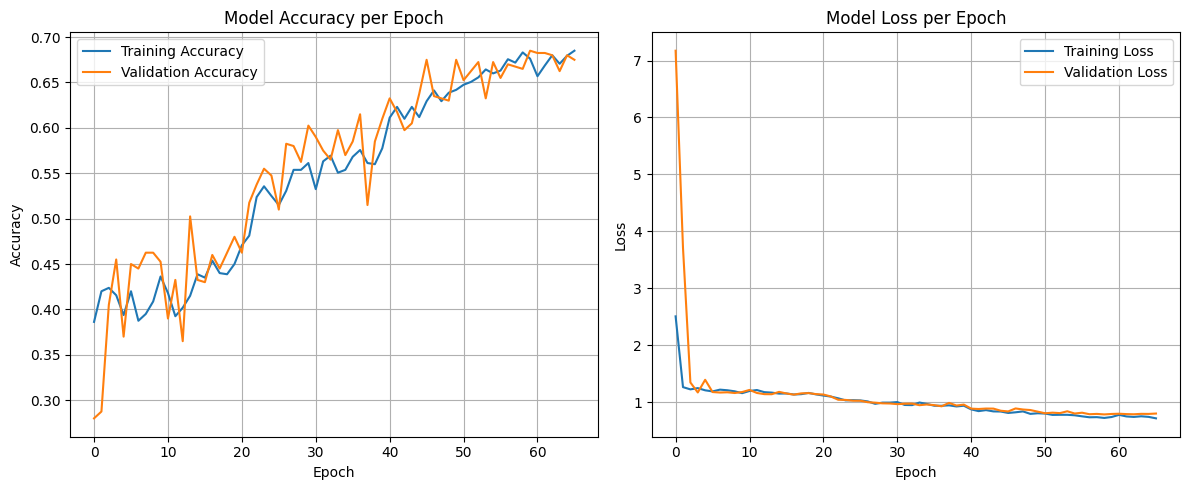

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# **Load Dataset with Augmentation**
def load_dataset(directory, subset, validation_split=0.2, batch_size=32, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.1),
            layers.RandomContrast(0.1),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names

# **Load Training & Validation Datasets**
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=32, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=32, augment=False)

num_classes = len(class_names)

# **Optimized CNN Model**
def build_best_cnn():
    inputs = keras.Input(shape=(128, 128, 3))

    # **Block 1**
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 2**
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 3**
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Block 4**
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # **Fully Connected Layers**
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="Best_CNN")

    # **SGD + Momentum (Better than Adam for this case)**
    optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

# **Train Model**
model = build_best_cnn()
print(model.summary())

# **Callbacks**
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)

# **Train the Model**
history = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=[early_stopping, lr_scheduler])

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save Model**
model.save('best_cnn.keras')

# **Plot Accuracy & Loss**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "Best_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 9,563,428 (36.48 MB)

 Trainable params: 9,563,428 (36.48 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 678ms/step - accuracy: 0.2567 - loss: 1.3838 - val_accuracy: 0.2425 - val_loss: 1.3839 - learning_rate: 0.0050
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 785ms/step - accuracy: 0.2698 - loss: 1.3714 - val_accuracy: 0.2850 - val_loss: 1.3768 - learning_rate: 0.0050
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 677ms/step - accuracy: 0.3462 - loss: 1.3346 - val_accuracy: 0.2700 - val_loss: 1.3792 - learning_rate: 0.0050
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 792ms/step - accuracy: 0.3195 - loss: 1.3451 - val_accuracy: 0.3250 - val_loss: 1.3492 - learning_rate: 0.0050
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 639ms/step - accuracy: 0.3599 - loss: 1.3116 - val_accuracy: 0.2900 - val_loss: 1.3617 - learning_rate: 0.0050
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 675ms/step - accuracy: 0.3720 - loss: 1.3106 - val_accuracy: 0.3625 - val_loss: 1.3407 - learning_rate: 0.0050
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 703ms/step - accuracy: 0.3940 - los

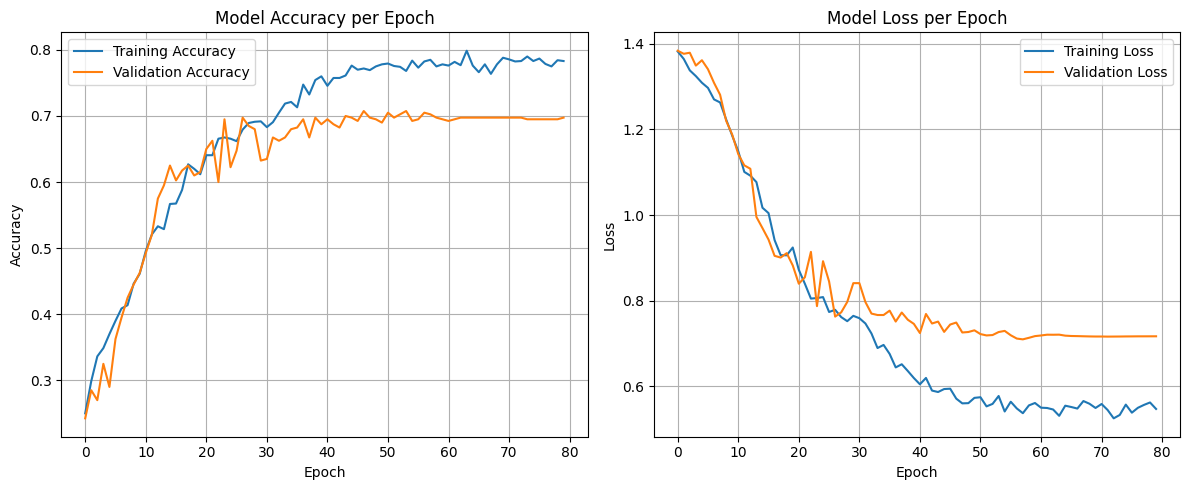

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# **Load Dataset with Augmentation**
def load_dataset(directory, subset, validation_split=0.2, batch_size=64, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.1),
            layers.RandomContrast(0.1),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names

# **Load Training & Validation Datasets**
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=64, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=64, augment=False)

num_classes = len(class_names)

# **Optimized CNN Model**
def build_best_cnn():
    inputs = keras.Input(shape=(128, 128, 3))

    # **Block 1**
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.2)(x)

    # **Block 2**
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # **Block 3**
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    # **Block 4**
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.5)(x)

    # **Fully Connected Layers**
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="Best_CNN")

    # **SGD Optimizer with Momentum**
    optimizer = keras.optimizers.SGD(learning_rate=0.005, momentum=0.98, nesterov=True)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

# **Train Model**
model = build_best_cnn()
print(model.summary())

# **Callbacks**
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)

# **Train the Model for 80 Epochs**
history = model.fit(train_ds, epochs=80, validation_data=val_ds, callbacks=[lr_scheduler])

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# **Save Model**
model.save('best_cnn_model.keras')

# **Plot Accuracy & Loss**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "Best_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu (LeakyReLU)   │ (None, 128, 128, 64)   │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ leaky_re_lu[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_1 (LeakyReLU) │ (None, 128, 128, 64)   │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ leaky_re_lu_1[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64, 64, 64)     │              0 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_2 (LeakyReLU) │ (None, 64, 64, 128)    │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ leaky_re_lu_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_3 (LeakyReLU) │ (None, 64, 64, 128)    │              0 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 128)    │              0 │ leaky_re_lu_3[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 32, 32, 128)    │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_4 (LeakyReLU) │ (None, 32, 32, 256)    │              0 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ leaky_re_lu_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_5 (LeakyReLU) │ (None, 32, 32, 256)    │              0 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 256)    │              0 │ leaky_re_lu_5[0][0]    │
│ (MaxPooling2D)       

 Total params: 39,030,340 (148.89 MB)

 Trainable params: 39,030,340 (148.89 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 49s 418ms/step - accuracy: 0.2923 - loss: 1.4726 - val_accuracy: 0.2675 - val_loss: 1.3866
Epoch 2/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 425ms/step - accuracy: 0.2887 - loss: 1.3897 - val_accuracy: 0.3325 - val_loss: 1.3911
Epoch 3/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 437ms/step - accuracy: 0.2950 - loss: 1.3845 - val_accuracy: 0.3850 - val_loss: 1.3460
Epoch 4/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 363ms/step - accuracy: 0.3451 - loss: 1.3682 - val_accuracy: 0.3500 - val_loss: 1.3695
Epoch 5/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 396ms/step - accuracy: 0.3220 - loss: 1.3472 - val_accuracy: 0.3925 - val_loss: 1.3747
Epoch 6/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 367ms/step - accuracy: 0.4444 - loss: 1.2872 - val_accuracy: 0.3500 - val_loss: 1.2849
Epoch 7/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 384ms/step - accuracy: 0.4282 - loss: 1.2941 - val_accuracy: 0.4450 - val_loss: 1.2574
Epoch 8/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 380ms/step - accuracy: 0.4489 - loss: 1.1949 - val

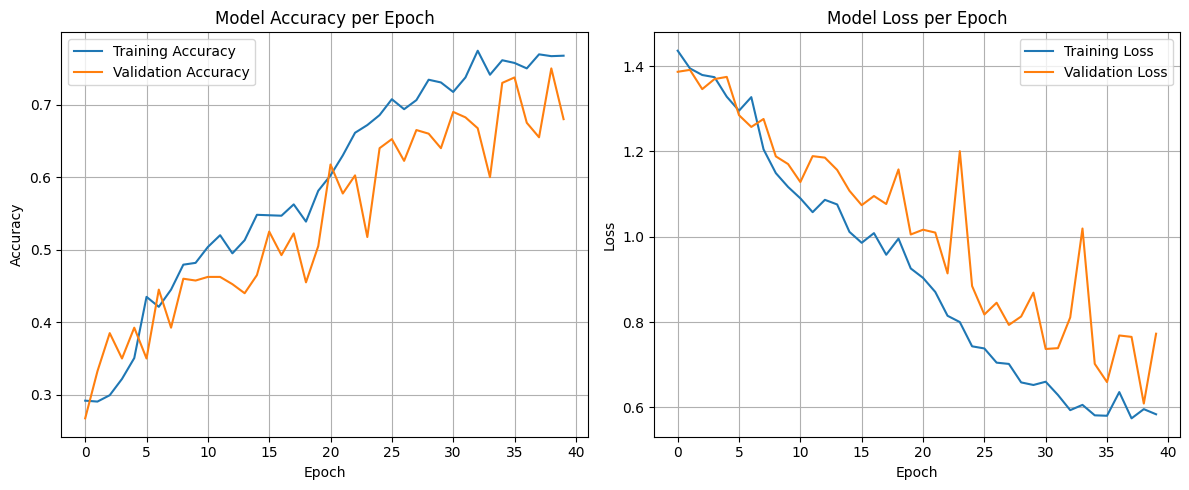

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# **Load Dataset with Augmentation**
def load_dataset(directory, subset, validation_split=0.2, batch_size=32, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.15),
            layers.RandomZoom(0.15),
            layers.RandomContrast(0.1),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names

# **Load Training & Validation Datasets**
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=32, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=32, augment=False)

num_classes = len(class_names)

# **Optimized CNN Model**
def build_best_cnn():
    inputs = keras.Input(shape=(128, 128, 3))

    # **Block 1**
    x = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.2)(x)

    # **Block 2**
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # **Block 3**
    x = layers.Conv2D(256, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(256, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # **Block 4**
    x = layers.Conv2D(512, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(512, (3, 3), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    # **Residual Connection (Improves Learning Stability)**
    shortcut = layers.Conv2D(512, (1, 1), padding="same")(x)
    x = layers.Add()([x, shortcut])
    x = layers.LeakyReLU()(x)

    # **Fully Connected Layers**
    x = layers.Flatten()(x)
    x = layers.Dense(1024, activation='leaky_relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='leaky_relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="Best_CNN")

    # **Optimized AdamW Optimizer**
    optimizer = keras.optimizers.AdamW(learning_rate=0.0005, weight_decay=0.0001)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

# **Train Model**
model = build_best_cnn()
print(model.summary())

# **Train the Model**
history = model.fit(train_ds, epochs=40, validation_data=val_ds)

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save Model**
model.save('best_cnn_optimized.keras')

# **Plot Accuracy & Loss**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# **Load Dataset with Augmentation**
def load_dataset(directory, subset, validation_split=0.2, batch_size=128, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.1),
            layers.RandomContrast(0.1),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names

# **Load Training & Validation Datasets**
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=128, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=128, augment=False)

num_classes = len(class_names)

# **Optimized CNN Model**
def build_cnn_model():
    inputs = keras.Input(shape=(128, 128, 3))

    # **Block 1**
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.2)(x)  # Reduced dropout for faster training

    # **Block 2**
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.25)(x)

    # **Block 3**
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # **Block 4**
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.35)(x)

    # **Fully Connected Layers**
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="Optimized_CNN")

    # **SGD Optimizer with Momentum**
    optimizer = keras.optimizers.SGD(learning_rate=0.005, momentum=0.98, nesterov=True)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

# **Train Model**
model = build_cnn_model()
print(model.summary())

# **Callbacks**
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)

# **Train the Model for 100 Epochs**
history = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=[lr_scheduler])

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# **Save Model**
model.save('optimized_cnn_model.keras')

# **Plot Accuracy & Loss**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "Optimized_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 9,563,428 (36.48 MB)

 Trainable params: 9,563,428 (36.48 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 383s 27s/step - accuracy: 0.2539 - loss: 1.3891 - val_accuracy: 0.2250 - val_loss: 1.3868 - learning_rate: 0.0050
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 282s 21s/step - accuracy: 0.2712 - loss: 1.3806 - val_accuracy: 0.2375 - val_loss: 1.3859 - learning_rate: 0.0050
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 317s 21s/step - accuracy: 0.2552 - loss: 1.3729 - val_accuracy: 0.3175 - val_loss: 1.3805 - learning_rate: 0.0050
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 288s 22s/step - accuracy: 0.3268 - loss: 1.3468 - val_accuracy: 0.2950 - val_loss: 1.3751 - learning_rate: 0.0050
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 275s 20s/step - accuracy: 0.3418 - loss: 1.3337 - val_accuracy: 0.3025 - val_loss: 1.3661 - learning_rate: 0.0050
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 280s 21s/step - accuracy: 0.3678 - loss: 1.3070 - val_accuracy: 0.2800 - val_loss: 1.3785 - learning_rate: 0.0050
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 275s 21s/step - accuracy: 0.3580 - los

Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "Fixed_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 13,105,956 (50.00 MB)

 Trainable params: 13,105,956 (50.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 391s 15s/step - accuracy: 0.2405 - loss: 2.4918 - val_accuracy: 0.2300 - val_loss: 1.3891
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 394s 16s/step - accuracy: 0.2541 - loss: 1.3869 - val_accuracy: 0.2525 - val_loss: 1.3882
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 381s 15s/step - accuracy: 0.2518 - loss: 1.3852 - val_accuracy: 0.2400 - val_loss: 1.3875
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 374s 15s/step - accuracy: 0.2916 - loss: 1.3761 - val_accuracy: 0.2975 - val_loss: 1.3777
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 372s 15s/step - accuracy: 0.2949 - loss: 1.3653 - val_accuracy: 0.3325 - val_loss: 1.3646
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 382s 15s/step - accuracy: 0.2918 - loss: 1.3725 - val_accuracy: 0.3250 - val_loss: 1.3647
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 397s 15s/step - accuracy: 0.3068 - loss: 1.3538 - val_accuracy: 0.3100 - val_loss: 1.3635
Epoch 8/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 428s 15s/step - accuracy: 0.3540 - loss: 1.3303 - val_accurac

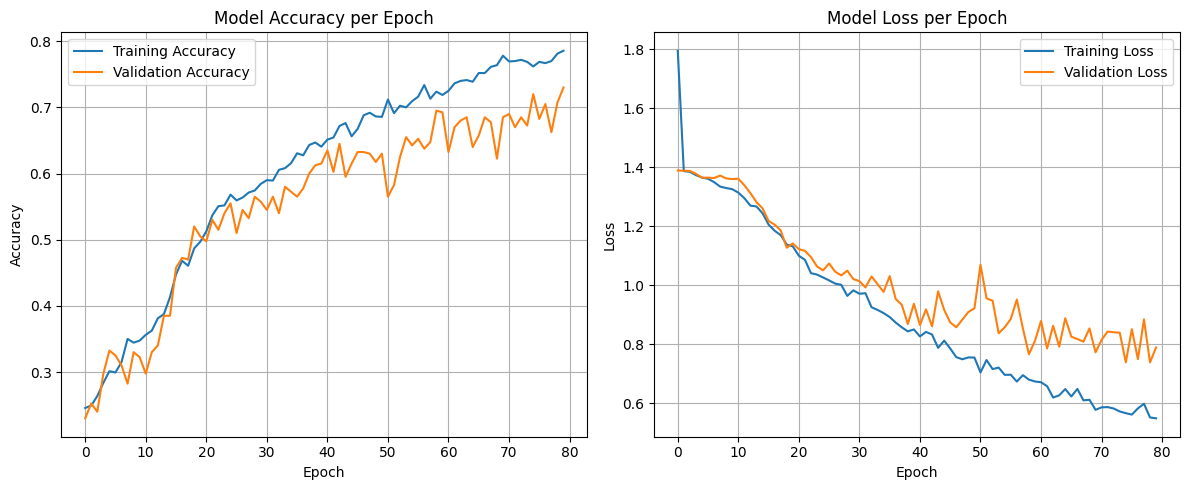

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# **Load Dataset with Augmentation**
def load_dataset(directory, subset, validation_split=0.2, batch_size=64, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.15),
            layers.RandomZoom(0.15),
            layers.RandomContrast(0.15),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x), y))

    return dataset.prefetch(tf.data.AUTOTUNE), class_names

# **Load Training & Validation Datasets**
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=64, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=64, augment=False)

num_classes = len(class_names)

#  Fixed CNN Model**
def build_fixed_cnn():
    inputs = keras.Input(shape=(128, 128, 3))

    # **Block 1**
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.1)(x)

    # **Block 2**
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.15)(x)

    # **Block 3**
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.2)(x)

    # **Block 4**
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.25)(x)

    # **Block 5**
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # **Fully Connected Layers**
    x = layers.Flatten()(x)
    x = layers.Dense(1024, activation='relu', kernel_initializer='he_normal')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="Fixed_CNN")

    # **Use SGD Optimizer with LR Scheduler**
    initial_lr = 0.01
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_lr, decay_steps=1000, decay_rate=0.96, staircase=True
    )

    optimizer = keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.95, nesterov=True)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

# **Train Model**
model = build_fixed_cnn()
print(model.summary())

# **Callbacks**
#early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
model_checkpoint = keras.callbacks.ModelCheckpoint("best_fixed_cnn.keras", save_best_only=True, monitor="val_accuracy")

# **Train the Model**
history = model.fit(train_ds, epochs=80, validation_data=val_ds, callbacks=[model_checkpoint])

# **Load Best Model**
model = keras.models.load_model("best_fixed_cnn.keras")

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# **Save Final Model**
model.save('final_fixed_cnn.keras')

# **Plot Accuracy & Loss**
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "UltraFast_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast (Cast)                          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast_1 (Cast)                        │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,331,172 (5.08 MB)

 Trainable params: 1,331,172 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.2563 - loss: 1.3884 - val_accuracy: 0.2675 - val_loss: 1.4078
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.2965 - loss: 1.3771 - val_accuracy: 0.2800 - val_loss: 1.3570
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.3432 - loss: 1.3289 - val_accuracy: 0.4300 - val_loss: 1.2695
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.4376 - loss: 1.2149 - val_accuracy: 0.4550 - val_loss: 1.2292
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.4668 - loss: 1.1389 - val_accuracy: 0.5625 - val_loss: 1.0838
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.5745 - loss: 1.0068 - val_accuracy: 0.5750 - val_loss: 1.0287
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.5900 - loss: 0.9880 - val_accuracy: 0.5950 - val_loss: 0.9563
Epoch 8/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.6156 - loss: 0.8704 - val

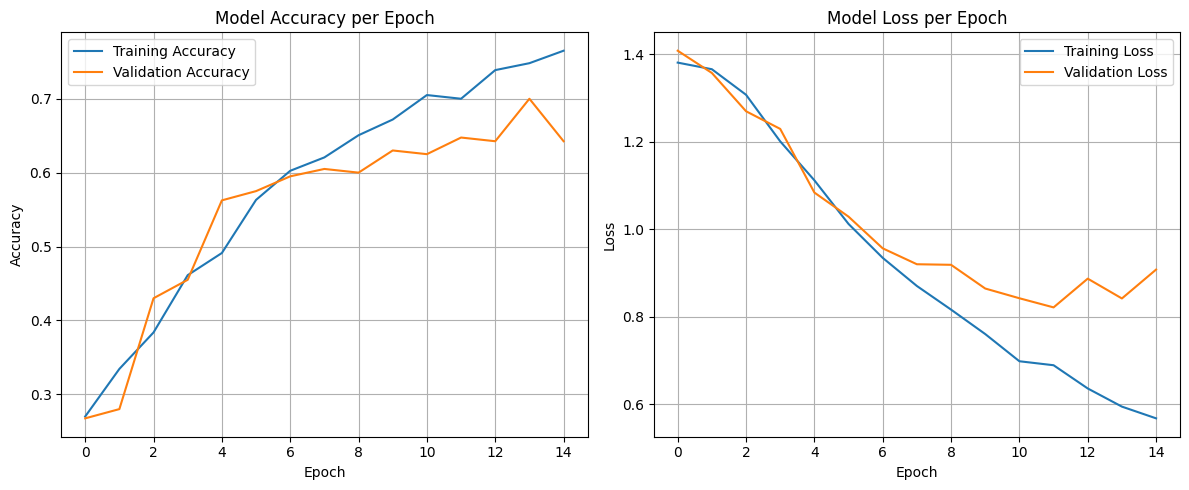

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# **Enable Mixed Precision**
tf.keras.mixed_precision.set_global_policy("mixed_float16")

# **Enable XLA Compilation**
tf.config.optimizer.set_jit(True)

# **Dataset Path**
data_path = '/content/drive/MyDrive/dataset'

# **Load Dataset (Optimized)**
def load_dataset(directory, subset, validation_split=0.2, batch_size=16, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(32, 32),  # **Smaller image size**
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    class_names = dataset.class_names
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    if augment:
        data_augmentation = keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.1),
            layers.RandomContrast(0.1),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x), y))

    return dataset.cache().shuffle(500).prefetch(tf.data.AUTOTUNE), class_names

# **Load Training & Validation Datasets**
train_ds, class_names = load_dataset(data_path, subset="training", batch_size=16, augment=True)
val_ds, _ = load_dataset(data_path, subset="validation", batch_size=16, augment=False)

num_classes = len(class_names)

# **Ultra-Fast CNN Model**
def build_ultra_fast_cnn():
    inputs = keras.Input(shape=(32, 32, 3))

    # **Block 1**
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.1)(x)

    # **Block 2**
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.15)(x)

    # **Block 3**
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Dropout(0.2)(x)  # **No pooling here to reduce time**

    # **Fully Connected Layers**
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)  # **Reduced from 256**
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax', dtype='float32')(x)

    model = keras.Model(inputs, outputs, name="UltraFast_CNN")

    # **Fast AdamW Optimizer**
    optimizer = keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

# **Train Model**
model = build_ultra_fast_cnn()
print(model.summary())

# **Callbacks**
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
model_checkpoint = keras.callbacks.ModelCheckpoint("best_ultra_fast_cnn.keras", save_best_only=True, monitor="val_accuracy")

# **Train the Model (FAST)**
history = model.fit(train_ds, epochs=40, validation_data=val_ds, callbacks=[early_stopping, model_checkpoint])

# **Load Best Model**
model = keras.models.load_model("best_ultra_fast_cnn.keras")

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# **Save Final Model**
model.save('final_ultra_fast_cnn.keras')

# **Plot Accuracy & Loss**
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,819,524 (6.94 MB)

 Trainable params: 1,817,604 (6.93 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 430s 36s/step - accuracy: 0.3102 - loss: 1.8009 - val_accuracy: 0.2683 - val_loss: 5.5877 - learning_rate: 5.0000e-04
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 354s 32s/step - accuracy: 0.4246 - loss: 1.3290 - val_accuracy: 0.2967 - val_loss: 4.4785 - learning_rate: 5.0000e-04
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 355s 32s/step - accuracy: 0.4637 - loss: 1.2157 - val_accuracy: 0.3267 - val_loss: 3.4592 - learning_rate: 5.0000e-04
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 373s 31s/step - accuracy: 0.4858 - loss: 1.2358 - val_accuracy: 0.2733 - val_loss: 3.6879 - learning_rate: 5.0000e-04
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 380s 31s/step - accuracy: 0.5185 - loss: 1.1256 - val_accuracy: 0.2400 - val_loss: 2.2754 - learning_rate: 5.0000e-04
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 345s 31s/step - accuracy: 0.5331 - loss: 1.0955 - val_accuracy: 0.2933 - val_loss: 2.0219 - learning_rate: 5.0000e-04
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 395s 31s/step - accuracy: 

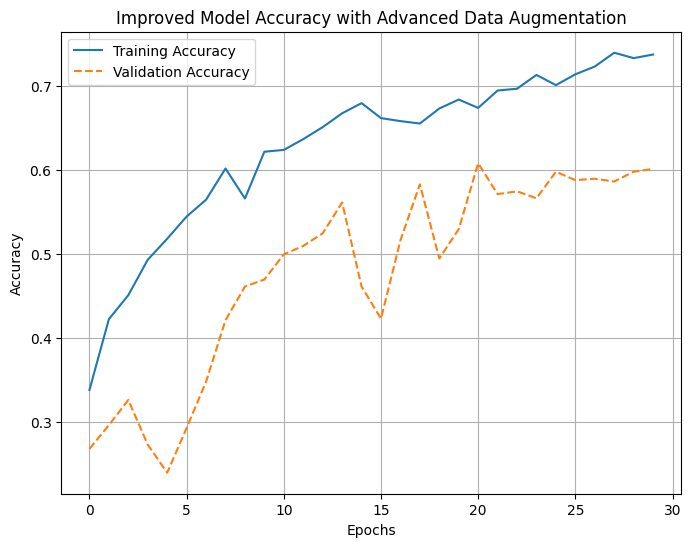

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
Classification Report:
               precision    recall  f1-score   support

           0     0.8624    0.6963    0.7705       135
           1     0.9351    0.4832    0.6372       149
           2     0.5851    0.3548    0.4418       155
           3     0.4375    0.8696    0.5821       161

    accuracy                         0.6017       600
   macro avg     0.7050    0.6010    0.6079       600
weighted avg     0.6948    0.6017    0.6019       600



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Define dataset path
data_path = '/content/drive/MyDrive/dataset'

# Enhanced Data Augmentation Pipeline
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Flip images in both directions
    layers.RandomRotation(0.2),  # Increase rotation variability
    layers.RandomZoom(0.2),  # Stronger zoom augmentation
    layers.RandomContrast(0.2),  # Adjust contrast
    layers.RandomBrightness(0.2),  # Change brightness levels
    layers.RandomTranslation(0.2, 0.2),  # Move images slightly in any direction
    layers.RandomShear(0.2),  # Apply shear distortions
])

def load_dataset(directory, subset, validation_split=0.3, batch_size=128):
    return tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

train_ds = load_dataset(data_path, subset="training", batch_size=128).map(lambda x, y: (data_augmentation(x), y))
val_ds = load_dataset(data_path, subset="validation", batch_size=128)

# Prefetching for faster loading
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Define the existing model (90% accuracy version)
def build_custom_model(input_shape=(128, 128, 3), num_classes=4):
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train model with Data Augmentation
model = build_custom_model()
model.summary()

history = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[lr_scheduler])

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Save the improved model
model.save('improved_model_with_advanced_augmentation.keras')

# Plot training & validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Improved Model Accuracy with Advanced Data Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Get classification report
y_true = []
y_pred = []

for images, labels in val_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# Compute classification report
report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n", report)


Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.
Using device: CPU (Training will be slow)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,584,004 (17.49 MB)

 Trainable params: 4,584,004 (17.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 234s 10s/step - accuracy: 0.2718 - loss: 1.5355 - val_accuracy: 0.3750 - val_loss: 1.3341 - learning_rate: 5.0000e-04
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 153s 5s/step - accuracy: 0.4562 - loss: 1.2434 - val_accuracy: 0.3933 - val_loss: 1.3150 - learning_rate: 5.0000e-04
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.4998 - loss: 1.1067 - val_accuracy: 0.4717 - val_loss: 1.1625 - learning_rate: 5.0000e-04
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 120s 5s/step - accuracy: 0.5223 - loss: 1.0629 - val_accuracy: 0.5383 - val_loss: 1.0719 - learning_rate: 5.0000e-04
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.5882 - loss: 0.9461 - val_accuracy: 0.5067 - val_loss: 1.0120 - learning_rate: 5.0000e-04
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.6212 - loss: 0.9029 - val_accuracy: 0.6067 - val_loss: 0.8898 - learning_rate: 5.0000e-04
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step - accuracy: 0.6479

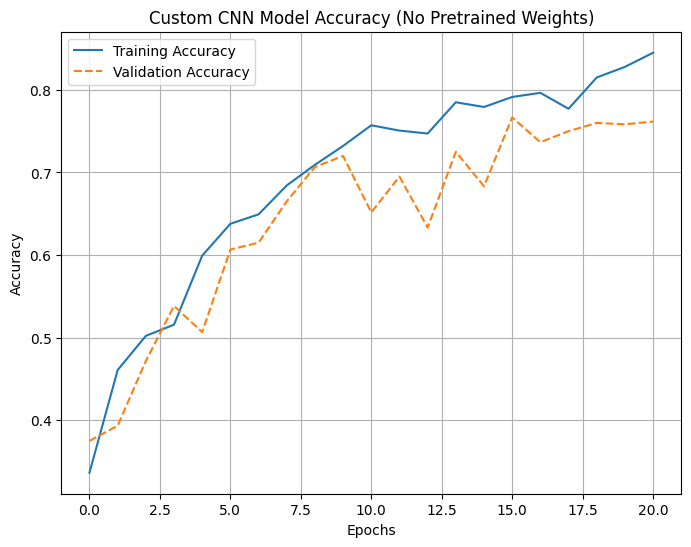

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

#  Define dataset path
data_path = '/content/drive/MyDrive/dataset'

# **Preprocessing Function (Ensures Faster Training)**
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])  # Resize only once
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
    return image, label

# **Function to Load Dataset (Preprocessed Before Training)**
def load_dataset(directory, subset, validation_split=0.3, batch_size=64, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)  # Normalize images

    return dataset.prefetch(tf.data.AUTOTUNE)

# **Load Training & Validation Dataset**
train_ds = load_dataset(data_path, subset="training", batch_size=64)
val_ds = load_dataset(data_path, subset="validation", batch_size=64)

# **Improved Custom CNN Model (No Pretrained Weights)**
def build_custom_model(input_shape=(128, 128, 3), num_classes=4):
    inputs = keras.Input(shape=input_shape)

    # **First Conv Block**
    x = layers.Conv2D(32, (3, 3), padding="same")(inputs)
    x = layers.LeakyReLU()(x)  # Better than ReLU
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    #  **Second Conv Block**
    x = layers.Conv2D(64, (3, 3), padding="same")(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    #  **Third Conv Block**
    x = layers.Conv2D(128, (3, 3), padding="same")(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    #  **Fourth Conv Block**
    x = layers.Conv2D(256, (3, 3), padding="same")(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    # **Fully Connected Layers**
    x = layers.Flatten()(x)
    x = layers.Dense(256)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

#  **Enable GPU Training (if available)**
device_name = tf.test.gpu_device_name()
print(f"Using device: {device_name if device_name else 'CPU (Training will be slow)'}")

#  **Build & Train Model**
model = build_custom_model()
model.summary()  # Print model summary

#  **Use Early Stopping & Learning Rate Scheduler**
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
]

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=callbacks)

#  **Evaluate Model on Validation Set**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f' Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save the Improved Model**
model.save('custom_cnn_model.keras')

# **Plot Training & Validation Accuracy**
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Custom CNN Model Accuracy (No Pretrained Weights)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.
Using device: CPU (Training will be slow)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,667,012 (13.99 MB)

 Trainable params: 3,667,012 (13.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 151s 6s/step - accuracy: 0.2500 - loss: 1.5355 - val_accuracy: 0.3067 - val_loss: 1.3700 - learning_rate: 5.0000e-04
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 121s 5s/step - accuracy: 0.3015 - loss: 1.3704 - val_accuracy: 0.3450 - val_loss: 1.3539 - learning_rate: 5.0000e-04
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 122s 5s/step - accuracy: 0.3770 - loss: 1.3299 - val_accuracy: 0.4150 - val_loss: 1.3434 - learning_rate: 5.0000e-04
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.3866 - loss: 1.3317 - val_accuracy: 0.3433 - val_loss: 1.3505 - learning_rate: 5.0000e-04
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 149s 5s/step - accuracy: 0.4569 - loss: 1.2434 - val_accuracy: 0.4217 - val_loss: 1.2194 - learning_rate: 5.0000e-04
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 119s 5s/step - accuracy: 0.4306 - loss: 1.2347 - val_accuracy: 0.5000 - val_loss: 1.1171 - learning_rate: 5.0000e-04
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 122s 5s/step - accuracy: 0.5225 

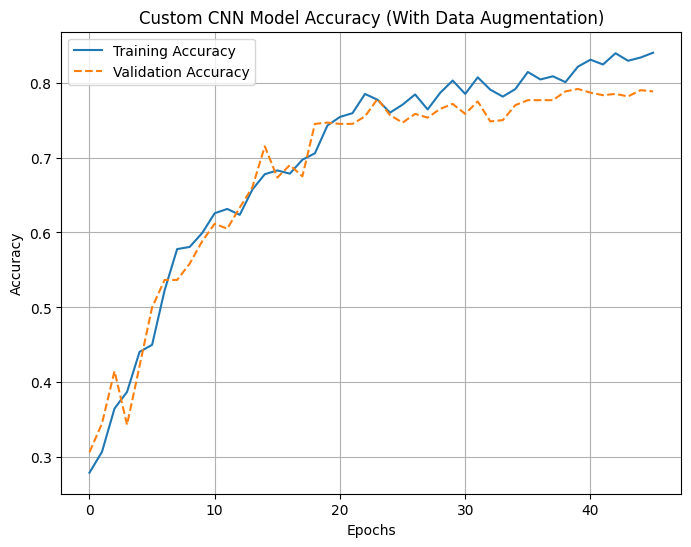

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Define dataset path
data_path = '/content/drive/MyDrive/dataset'

# **Data Augmentation Layer**
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)  # Flip horizontally
    image = tf.image.random_flip_up_down(image)  # Flip vertically
    image = tf.image.random_brightness(image, 0.2)  # Adjust brightness
    image = tf.image.random_contrast(image, 0.8, 1.2)  # Adjust contrast
    image = tf.image.random_saturation(image, 0.8, 1.2)  # Adjust saturation
    image = tf.image.random_hue(image, 0.08)  # Adjust hue

    # Resize properly (Ensures correct shape)
    image = tf.image.resize(image, [128, 128])  # Resize to the correct shape

    return image, label

# **Preprocessing Function**
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])  # Resize only once
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
    return image, label

# **Function to Load Dataset (With Augmentation in Training)**
def load_dataset(directory, subset, validation_split=0.3, batch_size=64, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)  # Normalize images

    if augment:
        dataset = dataset.map(lambda x, y: augment_image(x, y), num_parallel_calls=tf.data.AUTOTUNE)

    return dataset.prefetch(tf.data.AUTOTUNE)

# **Load Training & Validation Dataset**
train_ds = load_dataset(data_path, subset="training", batch_size=64, augment=True)
val_ds = load_dataset(data_path, subset="validation", batch_size=64, augment=False)

# **Improved CNN Model Without Batch Normalization**
def build_custom_model(input_shape=(128, 128, 3), num_classes=4):
    inputs = keras.Input(shape=input_shape)

    # **First Conv Block**
    x = layers.Conv2D(32, (3, 3), padding="same", kernel_initializer="glorot_uniform")(inputs)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.2)(x)

    # **Second Conv Block**
    x = layers.Conv2D(64, (3, 3), padding="same", kernel_initializer="glorot_uniform")(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # **Third Conv Block**
    x = layers.Conv2D(128, (3, 3), padding="same", kernel_initializer="glorot_uniform")(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # **Fourth Conv Block**
    x = layers.Conv2D(256, (3, 3), padding="same", kernel_initializer="glorot_uniform")(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    # **Fifth Conv Block**
    x = layers.Conv2D(512, (3, 3), padding="same", kernel_initializer="glorot_uniform")(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    # **Fully Connected Layers**
    x = layers.Flatten()(x)
    x = layers.Dense(256, kernel_initializer="glorot_uniform")(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='softmax', dtype=tf.float32)(x)  # Using softmax for multi-class classification

    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# **Enable GPU Training (if available)**
device_name = tf.test.gpu_device_name()
print(f"Using device: {device_name if device_name else 'CPU (Training will be slow)'}")

# **Build & Train Model**
model = build_custom_model()
model.summary()  # Print model summary

# **Use Early Stopping & Learning Rate Scheduler**
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
]

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=callbacks)

# **Evaluate Model on Validation Set**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save the Improved Model**
model.save('custom_cnn_model_augmented.keras')

# **Plot Training & Validation Accuracy**
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Custom CNN Model Accuracy (With Data Augmentation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64, 64, 64)     │              0 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 128)    │          8,320 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 64, 64, 128)    │              0 │ conv2d_3[0][0],        │
│                           │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 128)    │              0 │ add[0][0]              │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 32, 32, 128)    │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 256)    │              0 │ conv2d_4[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 16, 16, 256)    │              0 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 16, 16, 384)    │         98,688 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 384)    │        885,120 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 384)    │      2,457,984 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 16, 16, 1152)   │              0 │ conv2d_5[0][0],        │
│                      

 Total params: 41,719,812 (159.15 MB)

 Trainable params: 41,719,812 (159.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 601s 26s/step - accuracy: 0.2390 - loss: 3.0773 - val_accuracy: 0.3533 - val_loss: 1.8471 - learning_rate: 3.0000e-04
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 587s 25s/step - accuracy: 0.3352 - loss: 1.8242 - val_accuracy: 0.3717 - val_loss: 1.7930 - learning_rate: 2.7000e-04
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 571s 26s/step - accuracy: 0.3417 - loss: 1.7639 - val_accuracy: 0.4133 - val_loss: 1.7417 - learning_rate: 2.4300e-04
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 573s 26s/step - accuracy: 0.3420 - loss: 1.7283 - val_accuracy: 0.2783 - val_loss: 1.7103 - learning_rate: 2.1870e-04
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 572s 26s/step - accuracy: 0.3735 - loss: 1.6645 - val_accuracy: 0.4033 - val_loss: 1.6552 - learning_rate: 1.9683e-04
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 573s 26s/step - accuracy: 0.3488 - loss: 1.6470 - val_accuracy: 0.3200 - val_loss: 1.6789 - learning_rate: 1.7715e-04
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 589s 27s/step - accuracy: 

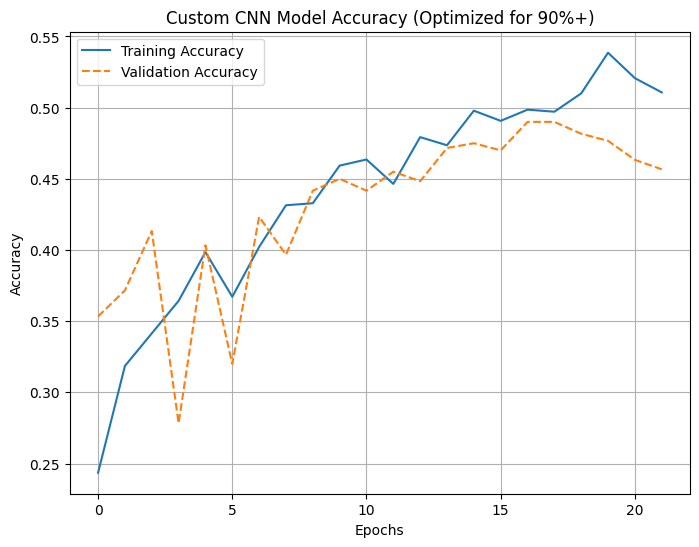

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Define dataset path
data_path = '/content/drive/MyDrive/dataset'

#  Advanced Data Augmentation**
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.15),
    layers.RandomContrast(0.3),
    layers.RandomBrightness(0.3),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.GaussianNoise(0.05),
])

# **Preprocessing Function**
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# **Load Dataset Function**
def load_dataset(directory, subset, validation_split=0.3, batch_size=64, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    if augment:
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)

    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)

    return dataset.prefetch(tf.data.AUTOTUNE)

# **Load Training & Validation Dataset**
train_ds = load_dataset(data_path, subset="training", batch_size=64, augment=True)
val_ds = load_dataset(data_path, subset="validation", batch_size=64, augment=False)

# *Optimized CNN Model (Inspired by ResNet)**
def build_custom_model(input_shape=(128, 128, 3), num_classes=4):
    inputs = keras.Input(shape=input_shape)

    # **First Conv Block**
    x = layers.Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.2)(x)

    # **Second Conv Block (Residual Connection)**
    shortcut = layers.Conv2D(128, (1, 1), padding="same")(x)
    x = layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
    x = layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
    x = layers.Add()([x, shortcut])  # Residual Connection
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # **Third Conv Block**
    x = layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # **Fourth Conv Block (Inception-like multi-kernel)**
    branch1 = layers.Conv2D(384, (1, 1), padding="same", activation="relu")(x)
    branch2 = layers.Conv2D(384, (3, 3), padding="same", activation="relu")(x)
    branch3 = layers.Conv2D(384, (5, 5), padding="same", activation="relu")(x)
    x = layers.Concatenate()([branch1, branch2, branch3])
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    # **Fully Connected Layers**
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.0005))(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0003),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# **Build & Train Model**
model = build_custom_model()
model.summary()

# **Use Early Stopping & Learning Rate Scheduling**
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True),
    keras.callbacks.LearningRateScheduler(lambda epoch: 0.0003 * 0.9 ** epoch)
]

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=callbacks)

# **Evaluate Model**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save the Model**
model.save('custom_cnn_model_optimized.keras')

# **Plot Training & Validation Accuracy**
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Custom CNN Model Accuracy (Optimized for 90%+)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.
Using device: CPU (Training will be slow)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,667,012 (13.99 MB)

 Trainable params: 3,667,012 (13.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - accuracy: 0.2380 - loss: 1.4526 - val_accuracy: 0.3050 - val_loss: 1.3737 - learning_rate: 5.0000e-04
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.2875 - loss: 1.3631 - val_accuracy: 0.3417 - val_loss: 1.3703 - learning_rate: 5.0000e-04
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 121s 5s/step - accuracy: 0.3329 - loss: 1.3518 - val_accuracy: 0.3733 - val_loss: 1.3460 - learning_rate: 5.0000e-04
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 116s 5s/step - accuracy: 0.3780 - loss: 1.3254 - val_accuracy: 0.3517 - val_loss: 1.3282 - learning_rate: 5.0000e-04
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.3902 - loss: 1.2724 - val_accuracy: 0.3050 - val_loss: 1.3269 - learning_rate: 5.0000e-04
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 121s 5s/step - accuracy: 0.3942 - loss: 1.2811 - val_accuracy: 0.4350 - val_loss: 1.1944 - learning_rate: 5.0000e-04
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 115s 5s/step - accuracy: 0.4761 

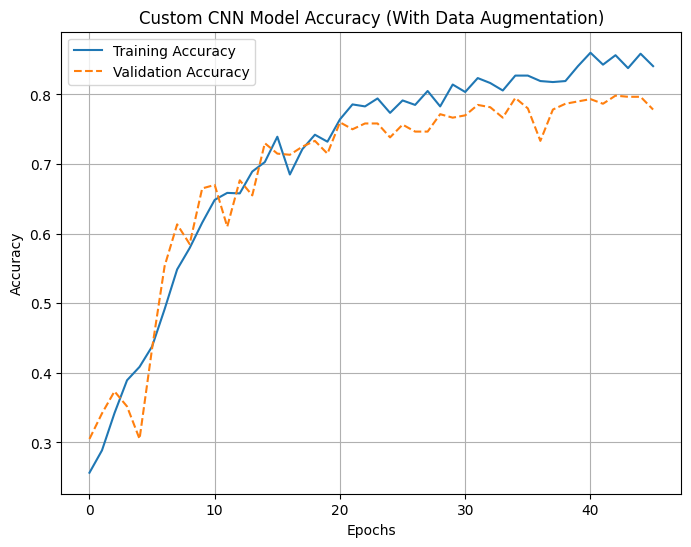

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Define dataset path
data_path = '/content/drive/MyDrive/dataset'

# **Data Augmentation Layer**
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)  # Flip horizontally
    image = tf.image.random_flip_up_down(image)  # Flip vertically
    image = tf.image.random_brightness(image, 0.2)  # Adjust brightness
    image = tf.image.random_contrast(image, 0.9, 1.1)  # Adjust contrast
    image = tf.image.random_saturation(image, 0.9, 1.1)  # Adjust saturation
    image = tf.image.random_hue(image, 0.07)  # Adjust hue

    # Resize properly (Ensures correct shape)
    image = tf.image.resize(image, [128, 128])  # Resize to the correct shape

    return image, label

# **Preprocessing Function**
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])  # Resize only once
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
    return image, label

# **Function to Load Dataset (With Augmentation in Training)**
def load_dataset(directory, subset, validation_split=0.3, batch_size=64, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )

    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)  # Normalize images

    if augment:
        dataset = dataset.map(lambda x, y: augment_image(x, y), num_parallel_calls=tf.data.AUTOTUNE)

    return dataset.prefetch(tf.data.AUTOTUNE)

# **Load Training & Validation Dataset**
train_ds = load_dataset(data_path, subset="training", batch_size=64, augment=True)
val_ds = load_dataset(data_path, subset="validation", batch_size=64, augment=False)

# **Improved CNN Model Without Batch Normalization**
def build_custom_model(input_shape=(128, 128, 3), num_classes=4):
    inputs = keras.Input(shape=input_shape)

    # **First Conv Block**
    x = layers.Conv2D(32, (3, 3), padding="same", kernel_initializer="glorot_uniform")(inputs)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.2)(x)

    # **Second Conv Block**
    x = layers.Conv2D(64, (3, 3), padding="same", kernel_initializer="glorot_uniform")(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # **Third Conv Block**
    x = layers.Conv2D(128, (3, 3), padding="same", kernel_initializer="glorot_uniform")(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # **Fourth Conv Block**
    x = layers.Conv2D(256, (3, 3), padding="same", kernel_initializer="glorot_uniform")(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    # **Fifth Conv Block**
    x = layers.Conv2D(512, (3, 3), padding="same", kernel_initializer="glorot_uniform")(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    # **Fully Connected Layers**
    x = layers.Flatten()(x)
    x = layers.Dense(256, kernel_initializer="glorot_uniform")(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='softmax', dtype=tf.float32)(x)  # Using softmax for multi-class classification

    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# **Enable GPU Training (if available)**
device_name = tf.test.gpu_device_name()
print(f"Using device: {device_name if device_name else 'CPU (Training will be slow)'}")

# **Build & Train Model**
model = build_custom_model()
model.summary()  # Print model summary

# **Use Early Stopping & Learning Rate Scheduler**
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
]

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=callbacks)

# **Evaluate Model on Validation Set**
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# **Save the Improved Model**
model.save('custom_cnn_model_augmented.keras')

# **Plot Training & Validation Accuracy**
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Custom CNN Model Accuracy (With Data Augmentation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,667,012 (13.99 MB)

 Trainable params: 3,667,012 (13.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.2514 - loss: 1.6057 - val_accuracy: 0.2717 - val_loss: 1.3809 - learning_rate: 5.0000e-04
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.2729 - loss: 1.3769 - val_accuracy: 0.3267 - val_loss: 1.3666 - learning_rate: 5.0000e-04
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.3493 - loss: 1.3581 - val_accuracy: 0.3700 - val_loss: 1.3613 - learning_rate: 5.0000e-04
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 147s 5s/step - accuracy: 0.3413 - loss: 1.3595 - val_accuracy: 0.3817 - val_loss: 1.3423 - learning_rate: 5.0000e-04
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 121s 5s/step - accuracy: 0.3499 - loss: 1.3449 - val_accuracy: 0.3700 - val_loss: 1.3233 - learning_rate: 5.0000e-04
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 117s 5s/step - accuracy: 0.3565 - loss: 1.3643 - val_accuracy: 0.4433 - val_loss: 1.2916 - learning_rate: 5.0000e-04
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 121s 5s/step - accuracy: 0.4730 

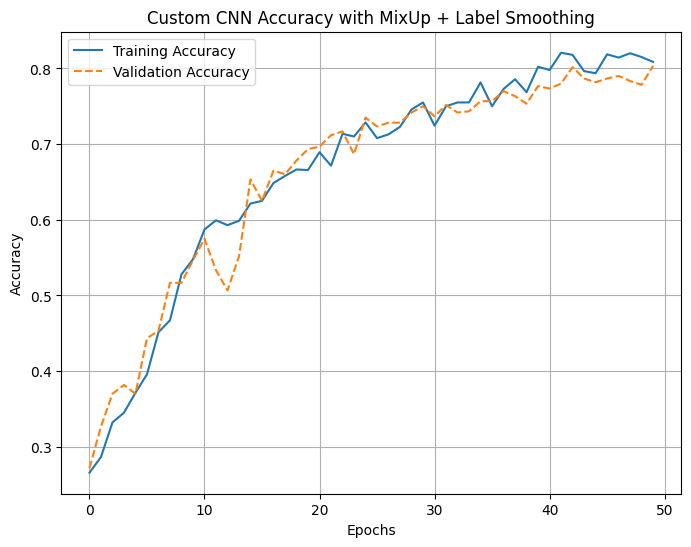

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Dataset path
data_path = '/content/drive/MyDrive/dataset'

# Improved Data Augmentation with MixUp
def mixup(image, label, alpha=0.2):
    beta = tf.random.uniform([], 0, alpha)
    index = tf.random.shuffle(tf.range(tf.shape(image)[0]))
    mixed_image = beta * image + (1 - beta) * tf.gather(image, index)
    mixed_label = beta * label + (1 - beta) * tf.gather(label, index)
    return mixed_image, mixed_label

def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, 0.2)
    image = tf.image.random_contrast(image, 0.9, 1.1)
    image = tf.image.random_saturation(image, 0.9, 1.1)
    image = tf.image.random_hue(image, 0.07)
    image = tf.image.resize(image, [128, 128])
    return image, label

# Normalize images
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Load dataset with optional mixup
def load_dataset(directory, subset, validation_split=0.3, batch_size=64, augment=False, mixup_enabled=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical')

    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)

    if augment:
        dataset = dataset.map(lambda x, y: augment_image(x, y), num_parallel_calls=tf.data.AUTOTUNE)
        if mixup_enabled:
            dataset = dataset.map(mixup, num_parallel_calls=tf.data.AUTOTUNE)

    return dataset.prefetch(tf.data.AUTOTUNE)

# Load train/val datasets
train_ds = load_dataset(data_path, subset="training", batch_size=64, augment=True, mixup_enabled=True)
val_ds = load_dataset(data_path, subset="validation", batch_size=64)

# Custom CNN Model with Label Smoothing
num_classes = 4
def build_custom_model(input_shape=(128, 128, 3)):
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, (3, 3), padding="same", kernel_initializer="glorot_uniform")(inputs)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(64, (3, 3), padding="same", kernel_initializer="glorot_uniform")(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(128, (3, 3), padding="same", kernel_initializer="glorot_uniform")(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(256, (3, 3), padding="same", kernel_initializer="glorot_uniform")(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Conv2D(512, (3, 3), padding="same", kernel_initializer="glorot_uniform")(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256, kernel_initializer="glorot_uniform")(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='softmax', dtype=tf.float32)(x)
    model = keras.Model(inputs, outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        metrics=['accuracy']
    )
    return model

# Callbacks
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
]

# Build and train model
model = build_custom_model()
model.summary()
history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=callbacks)

# Evaluate
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Save model
model.save('custom_cnn_mixup.keras')

# Plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Custom CNN Accuracy with MixUp + Label Smoothing')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,829,572 (22.24 MB)

 Trainable params: 5,829,572 (22.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 127s 5s/step - accuracy: 0.2609 - loss: 1.4271 - val_accuracy: 0.2650 - val_loss: 1.3843 - learning_rate: 0.0010
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 0.2773 - loss: 1.3761 - val_accuracy: 0.2617 - val_loss: 1.3864 - learning_rate: 0.0010
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 149s 5s/step - accuracy: 0.3333 - loss: 1.3451 - val_accuracy: 0.3983 - val_loss: 1.3064 - learning_rate: 0.0010
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - accuracy: 0.4406 - loss: 1.2416 - val_accuracy: 0.4450 - val_loss: 1.2132 - learning_rate: 0.0010
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 116s 5s/step - accuracy: 0.5257 - loss: 1.0328 - val_accuracy: 0.5533 - val_loss: 0.9695 - learning_rate: 0.0010
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - accuracy: 0.5594 - loss: 0.9421 - val_accuracy: 0.5683 - val_loss: 0.8990 - learning_rate: 0.0010
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.6260 - loss: 0.8034 - 

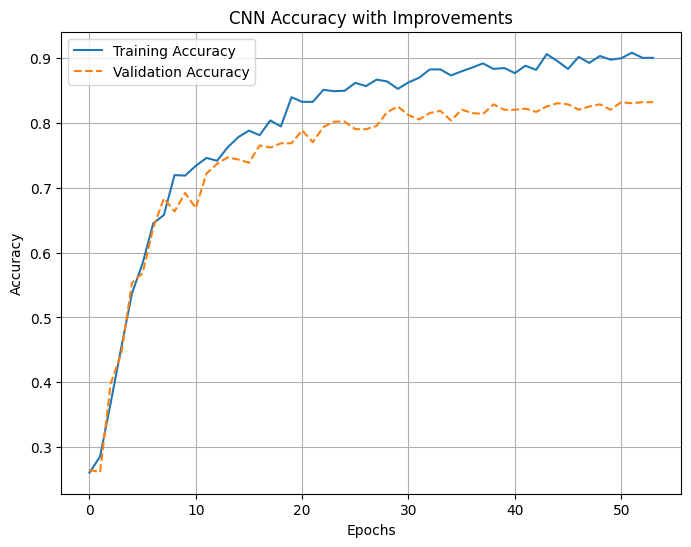

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Dataset path
data_path = "/content/drive/MyDrive/dataset"

# Updated Data Augmentation

def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.15)
    image = tf.image.random_contrast(image, 0.85, 1.15)
    image = tf.image.resize(image, [128, 128])
    return image, label

# Normalize

def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Load dataset

def load_dataset(directory, subset, validation_split=0.3, batch_size=64, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )
    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    if augment:
        dataset = dataset.map(lambda x, y: augment_image(x, y), num_parallel_calls=tf.data.AUTOTUNE)
    return dataset.prefetch(tf.data.AUTOTUNE)

# Load data
train_ds = load_dataset(data_path, subset="training", batch_size=64, augment=True)
val_ds = load_dataset(data_path, subset="validation", batch_size=64, augment=False)

# Enhanced CNN Model

def build_custom_model(input_shape=(128, 128, 3), num_classes=4):
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), padding="same", activation="relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(512, (3, 3), padding="same", activation="relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(512, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Callbacks
callbacks = [
    keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 0.5**(epoch // 10)),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True)
]

# Build and train model
model = build_custom_model()
model.summary()
history = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=callbacks)

# Evaluate
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Save model
model.save("custom_cnn_model_final.keras")

# Plot
plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", linestyle="dashed")
plt.title("CNN Accuracy with Improvements")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,700,932 (6.49 MB)

 Trainable params: 1,700,932 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.2597 - loss: 1.3831 - val_accuracy: 0.3875 - val_loss: 1.3770 - learning_rate: 3.0000e-04
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 0.3252 - loss: 1.3557 - val_accuracy: 0.3950 - val_loss: 1.3336 - learning_rate: 3.0000e-04
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.3752 - loss: 1.3115 - val_accuracy: 0.3750 - val_loss: 1.3034 - learning_rate: 3.0000e-04
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 120s 5s/step - accuracy: 0.4141 - loss: 1.2729 - val_accuracy: 0.4350 - val_loss: 1.2677 - learning_rate: 3.0000e-04
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 119s 5s/step - accuracy: 0.4132 - loss: 1.2600 - val_accuracy: 0.4250 - val_loss: 1.2746 - learning_rate: 3.0000e-04
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.4376 - loss: 1.2230 - val_accuracy: 0.4850 - val_loss: 1.2098 - learning_rate: 3.0000e-04
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 153s 5s/step - accuracy: 0.4785 

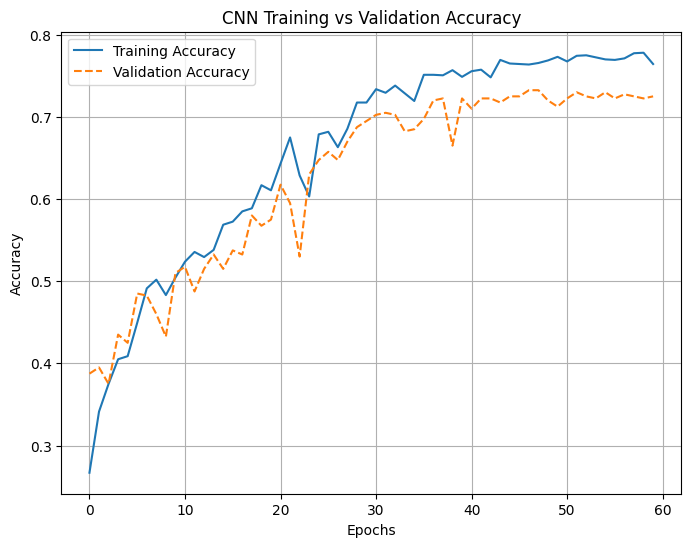

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

data_path = "/content/drive/MyDrive/dataset"

def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.2)
    image = tf.image.random_contrast(image, 0.85, 1.15)
    image = tf.image.random_saturation(image, 0.8, 1.2)
    image = tf.image.random_hue(image, 0.05)
    image = tf.image.resize(image, [128, 128])
    return image, label

def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

def load_dataset(directory, subset, validation_split=0.2, batch_size=64, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )
    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    if augment:
        dataset = dataset.map(lambda x, y: augment_image(x, y), num_parallel_calls=tf.data.AUTOTUNE)
    return dataset.prefetch(tf.data.AUTOTUNE)

train_ds = load_dataset(data_path, subset="training", augment=True)
val_ds = load_dataset(data_path, subset="validation")

def build_model(input_shape=(128, 128, 3), num_classes=4):
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, 3, padding="same", activation="relu")(inputs)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(128, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(256, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(512, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.4)(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0003),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

callbacks = [
    keras.callbacks.LearningRateScheduler(lambda epoch: 0.0003 * 0.5**(epoch // 10)),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True)
]

model = build_model()
model.summary()
history = model.fit(train_ds, epochs=60, validation_data=val_ds, callbacks=callbacks)

val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

model.save("cnn_best_model.keras")

plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", linestyle="--")
plt.title("CNN Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,676,900 (33.10 MB)

 Trainable params: 8,676,900 (33.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 314s 13s/step - accuracy: 0.2578 - loss: 9.9134 - val_accuracy: 0.2533 - val_loss: 1.3785 - learning_rate: 3.0000e-04
Epoch 2/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 222s 10s/step - accuracy: 0.3172 - loss: 1.3638 - val_accuracy: 0.3733 - val_loss: 1.3537 - learning_rate: 3.0000e-04
Epoch 3/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 221s 10s/step - accuracy: 0.4133 - loss: 1.2909 - val_accuracy: 0.3767 - val_loss: 1.2685 - learning_rate: 3.0000e-04
Epoch 4/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 202s 9s/step - accuracy: 0.4286 - loss: 1.1912 - val_accuracy: 0.3900 - val_loss: 1.2066 - learning_rate: 3.0000e-04
Epoch 5/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 226s 10s/step - accuracy: 0.5396 - loss: 1.0511 - val_accuracy: 0.4300 - val_loss: 1.1316 - learning_rate: 3.0000e-04
Epoch 6/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 255s 10s/step - accuracy: 0.5050 - loss: 1.0478 - val_accuracy: 0.4517 - val_loss: 1.0786 - learning_rate: 3.0000e-04
Epoch 7/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 262s 10s/step - accuracy: 0

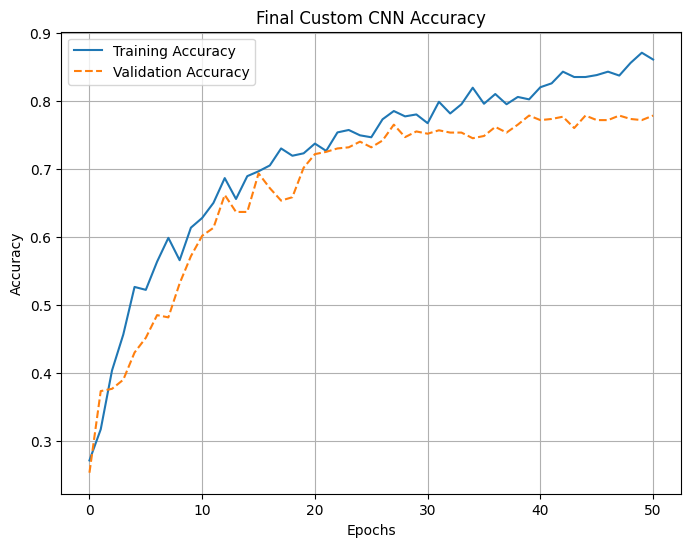

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Dataset path
data_path = "/content/drive/MyDrive/dataset"

# Best-balanced Data Augmentation for CNN
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.1)
    image = tf.image.random_contrast(image, 0.9, 1.1)
    image = tf.image.resize(image, [128, 128])
    return image, label

# Preprocessing: Resize & Normalize
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Load dataset function
def load_dataset(directory, subset, validation_split=0.3, batch_size=64, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )
    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    if augment:
        dataset = dataset.map(lambda x, y: augment_image(x, y), num_parallel_calls=tf.data.AUTOTUNE)
    return dataset.prefetch(tf.data.AUTOTUNE)

# Load train and validation data
train_ds = load_dataset(data_path, subset="training", batch_size=64, augment=True)
val_ds = load_dataset(data_path, subset="validation", batch_size=64, augment=False)

# Custom CNN Architecture (Final Optimized)
def build_custom_model(input_shape=(128, 128, 3), num_classes=4):
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, 3, padding="same", activation="relu", kernel_initializer='he_normal')(inputs)
    x = layers.Conv2D(32, 3, padding="same", activation="relu", kernel_initializer='he_normal')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(64, 3, padding="same", activation="relu", kernel_initializer='he_normal')(x)
    x = layers.Conv2D(64, 3, padding="same", activation="relu", kernel_initializer='he_normal')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(128, 3, padding="same", activation="relu", kernel_initializer='he_normal')(x)
    x = layers.Conv2D(128, 3, padding="same", activation="relu", kernel_initializer='he_normal')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.35)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0003),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Build model
model = build_custom_model()
model.summary()

# Training callbacks
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
]

# Train model
history = model.fit(train_ds, epochs=60, validation_data=val_ds, callbacks=callbacks)

# Evaluate
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Save model
model.save("custom_cnn_final_90plus.keras")

# Plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Final Custom CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,584,004 (17.49 MB)

 Trainable params: 4,584,004 (17.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 234s 9s/step - accuracy: 0.3034 - loss: 2.1212 - val_accuracy: 0.4033 - val_loss: 1.9191 - learning_rate: 3.0000e-04
Epoch 2/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.4537 - loss: 1.8297 - val_accuracy: 0.4750 - val_loss: 1.6952 - learning_rate: 3.0000e-04
Epoch 3/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - accuracy: 0.5236 - loss: 1.6251 - val_accuracy: 0.5567 - val_loss: 1.5380 - learning_rate: 3.0000e-04
Epoch 4/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 104s 5s/step - accuracy: 0.5958 - loss: 1.4687 - val_accuracy: 0.6350 - val_loss: 1.3785 - learning_rate: 3.0000e-04
Epoch 5/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.6451 - loss: 1.3363 - val_accuracy: 0.6400 - val_loss: 1.3318 - learning_rate: 3.0000e-04
Epoch 6/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.6484 - loss: 1.2780 - val_accuracy: 0.6650 - val_loss: 1.2714 - learning_rate: 3.0000e-04
Epoch 7/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.6800 -

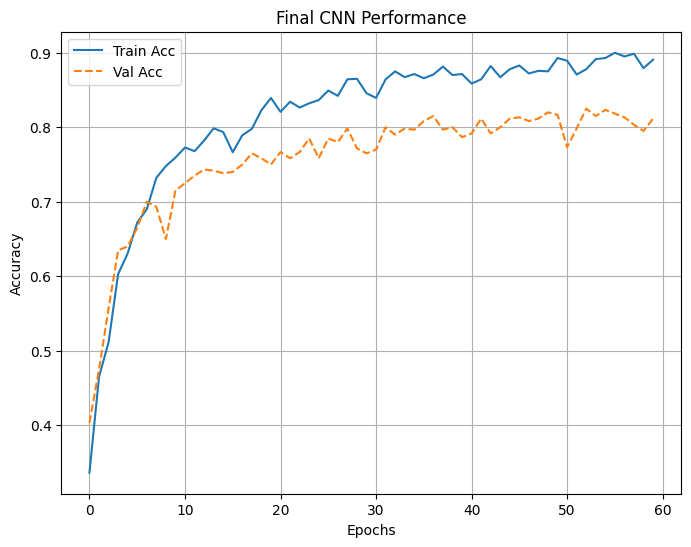

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt

# Dataset path
data_path = "/content/drive/MyDrive/dataset"

# Augmentation
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.1)
    image = tf.image.random_contrast(image, 0.9, 1.1)
    image = tf.image.resize(image, [128, 128])
    return image, label

# Preprocessing
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Load Dataset
def load_dataset(directory, subset, validation_split=0.3, batch_size=64, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )
    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    if augment:
        dataset = dataset.map(lambda x, y: augment_image(x, y), num_parallel_calls=tf.data.AUTOTUNE)
    return dataset.prefetch(tf.data.AUTOTUNE)

# Load Data
train_ds = load_dataset(data_path, subset="training", batch_size=64, augment=True)
val_ds = load_dataset(data_path, subset="validation", batch_size=64)

# Build Model
def build_custom_model(input_shape=(128, 128, 3), num_classes=4):
    l2 = regularizers.l2(0.001)
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, 3, padding="same", activation="relu", kernel_regularizer=l2)(inputs)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, 3, padding="same", activation="relu", kernel_regularizer=l2)(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(128, 3, padding="same", activation="relu", kernel_regularizer=l2)(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(256, 3, padding="same", activation="relu", kernel_regularizer=l2)(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu", kernel_regularizer=l2)(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0003),
        loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        metrics=["accuracy"]
    )
    return model

# Callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_accuracy", mode="max"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)
]

# Train
model = build_custom_model()
model.summary()
history = model.fit(train_ds, validation_data=val_ds, epochs=60, callbacks=callbacks)

# Evaluate
val_loss, val_accuracy = model.evaluate(val_ds)
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Save
model.save("custom_cnn_kittti.keras")

# Plot
plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Final CNN Performance")
plt.legend()
plt.grid(True)
plt.show()


Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 96, 96, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 96, 96, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 96, 96, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 96, 96, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,179,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 1,319,396 (5.03 MB)

 Trainable params: 1,319,396 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 258s 5s/step - accuracy: 0.2978 - loss: 1.4210 - val_accuracy: 0.4000 - val_loss: 1.3557 - learning_rate: 5.0000e-04
Epoch 2/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.4793 - loss: 1.2580 - val_accuracy: 0.5400 - val_loss: 1.1241 - learning_rate: 5.0000e-04
Epoch 3/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.5788 - loss: 1.0927 - val_accuracy: 0.5817 - val_loss: 1.0746 - learning_rate: 5.0000e-04
Epoch 4/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.6108 - loss: 1.0610 - val_accuracy: 0.5917 - val_loss: 1.0381 - learning_rate: 5.0000e-04
Epoch 5/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.6484 - loss: 1.0020 - val_accuracy: 0.6400 - val_loss: 0.9740 - learning_rate: 5.0000e-04
Epoch 6/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.6835 - loss: 0.9470 - val_accuracy: 0.6950 - val_loss: 0.9238 - learning_rate: 5.0000e-04
Epoch 7/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7075 

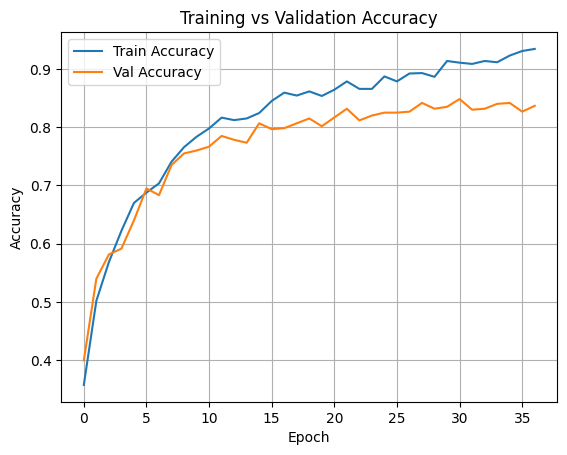

In [ ]:
import tensorflow as tf#Sequential
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

# Dataset path
data_path = "/content/drive/MyDrive/dataset"

# Preprocessing
def preprocess(image, label):
    image = tf.image.resize(image, [96, 96])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Augmentation
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    return image, label

# Load datasets
def load_dataset(path, subset, augment_data=False):
    ds = tf.keras.utils.image_dataset_from_directory(
        path,
        validation_split=0.3,
        subset=subset,
        seed=42,
        label_mode='categorical',
        image_size=(96, 96),
        batch_size=32
    )
    ds = ds.map(preprocess)
    if augment_data:
        ds = ds.map(augment)
    return ds.prefetch(tf.data.AUTOTUNE)

train_ds = load_dataset(data_path, "training", augment_data=True)
val_ds = load_dataset(data_path, "validation")

# Build CNN
def build_model(input_shape=(96, 96, 3), num_classes=4):
    l2 = regularizers.l2(1e-4)
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, 3, padding='same', kernel_regularizer=l2), layers.LeakyReLU(),
        layers.Conv2D(32, 3, padding='same', kernel_regularizer=l2), layers.LeakyReLU(),
        layers.MaxPooling2D(), layers.Dropout(0.25),

        layers.Conv2D(64, 3, padding='same', kernel_regularizer=l2), layers.LeakyReLU(),
        layers.Conv2D(64, 3, padding='same', kernel_regularizer=l2), layers.LeakyReLU(),
        layers.MaxPooling2D(), layers.Dropout(0.3),

        layers.Conv2D(128, 3, padding='same', kernel_regularizer=l2), layers.LeakyReLU(),
        layers.MaxPooling2D(), layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(64, kernel_regularizer=l2), layers.LeakyReLU(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        metrics=['accuracy']
    )
    return model

model = build_model()
model.summary()

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5, verbose=1)
]

# Training
history = model.fit(train_ds, validation_data=val_ds, epochs=60, callbacks=callbacks)

# Evaluation
val_loss, val_acc = model.evaluate(val_ds)
print(f"Training Accuracy: {history.history['accuracy'][-1]*100:.2f}%")
print(f"Validation Accuracy: {val_acc*100:.2f}%")

# Save
model.save("improved_custom_cnn.keras")

# Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,584,004 (17.49 MB)

 Trainable params: 4,584,004 (17.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 150s 6s/step - accuracy: 0.2548 - loss: 1.4990 - val_accuracy: 0.4383 - val_loss: 1.3795 - learning_rate: 5.0000e-04
Epoch 2/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 166s 5s/step - accuracy: 0.4695 - loss: 1.3233 - val_accuracy: 0.5083 - val_loss: 1.2350 - learning_rate: 5.0000e-04
Epoch 3/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 104s 5s/step - accuracy: 0.5207 - loss: 1.1754 - val_accuracy: 0.5300 - val_loss: 1.1444 - learning_rate: 5.0000e-04
Epoch 4/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.6018 - loss: 1.1046 - val_accuracy: 0.5933 - val_loss: 1.0587 - learning_rate: 5.0000e-04
Epoch 5/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 98s 4s/step - accuracy: 0.6502 - loss: 1.0088 - val_accuracy: 0.5533 - val_loss: 1.0740 - learning_rate: 5.0000e-04
Epoch 6/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.6123 - loss: 1.0303 - val_accuracy: 0.6150 - val_loss: 1.0020 - learning_rate: 5.0000e-04
Epoch 7/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.6826 - lo

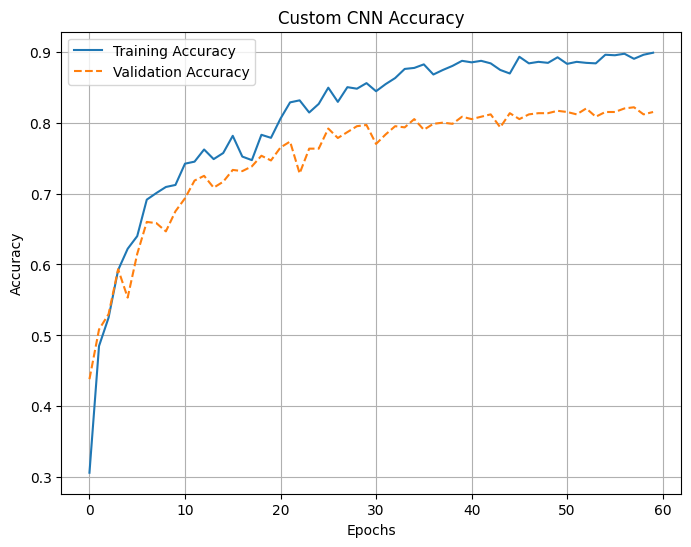

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Dataset path
data_path = "/content/drive/MyDrive/dataset"

# Data Augmentation (improved)
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.1)
    image = tf.image.random_contrast(image, 0.9, 1.1)
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], maxval=4, dtype=tf.int32))
    image = tf.image.resize(image, [128, 128])
    return image, label

# Normalization
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Dataset Loader
def load_dataset(directory, subset, validation_split=0.3, batch_size=64, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )
    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    if augment:
        dataset = dataset.map(lambda x, y: augment_image(x, y), num_parallel_calls=tf.data.AUTOTUNE)
    return dataset.prefetch(tf.data.AUTOTUNE)

# Load train/validation sets
train_ds = load_dataset(data_path, subset="training", augment=True)
val_ds = load_dataset(data_path, subset="validation")

# Build Custom CNN Model
def build_model(input_shape=(128, 128, 3), num_classes=4):
    l2 = keras.regularizers.l2(1e-4)
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, 3, padding="same", kernel_regularizer=l2)(inputs)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(128, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(256, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256, kernel_regularizer=l2)(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(num_classes, activation="softmax", kernel_regularizer=l2)(x)

    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
        metrics=["accuracy"]
    )
    return model

# Callbacks
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1),
    keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=6, restore_best_weights=True)
]

# Train the model
model = build_model()
model.summary()
history = model.fit(train_ds, validation_data=val_ds, epochs=60, callbacks=callbacks)

# Evaluate model
val_loss, val_acc = model.evaluate(val_ds)
train_acc = history.history["accuracy"][-1]
print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Validation Accuracy: {val_acc*100:.2f}%")

# Save model
model.save("custom_cnnplus.keras")

# Plot
plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", linestyle="dashed")
plt.title("Custom CNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 8,676,900 (33.10 MB)

 Trainable params: 8,676,900 (33.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 246s 10s/step - accuracy: 0.2802 - loss: 1.5595 - val_accuracy: 0.4233 - val_loss: 1.3999 - learning_rate: 5.0000e-04
Epoch 2/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 208s 9s/step - accuracy: 0.4663 - loss: 1.3455 - val_accuracy: 0.4450 - val_loss: 1.3362 - learning_rate: 5.0000e-04
Epoch 3/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 224s 10s/step - accuracy: 0.5243 - loss: 1.2621 - val_accuracy: 0.5567 - val_loss: 1.1938 - learning_rate: 5.0000e-04
Epoch 4/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 244s 9s/step - accuracy: 0.6194 - loss: 1.1397 - val_accuracy: 0.6050 - val_loss: 1.1280 - learning_rate: 5.0000e-04
Epoch 5/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 263s 9s/step - accuracy: 0.6467 - loss: 1.0558 - val_accuracy: 0.6267 - val_loss: 1.0656 - learning_rate: 5.0000e-04
Epoch 6/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 224s 10s/step - accuracy: 0.6511 - loss: 1.0705 - val_accuracy: 0.6867 - val_loss: 1.0172 - learning_rate: 5.0000e-04
Epoch 7/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 244s 9s/step - accuracy: 0.68

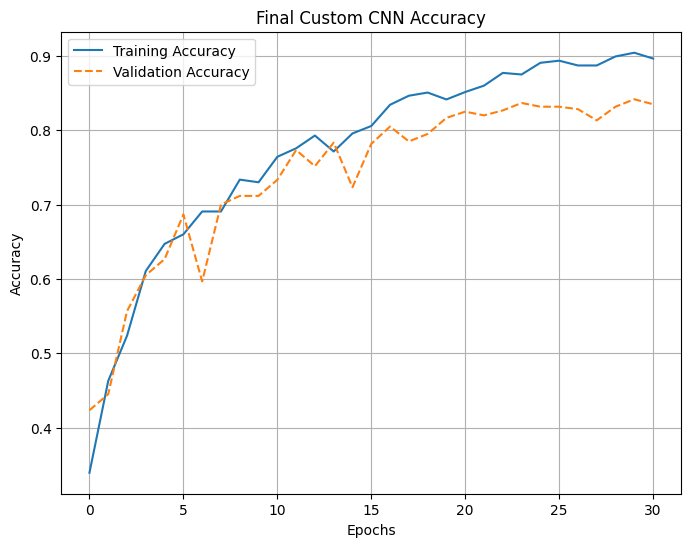

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Dataset path
data_path = "/content/drive/MyDrive/dataset"

# Data Augmentation
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.2)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    image = tf.image.random_saturation(image, 0.8, 1.2)
    image = tf.image.random_hue(image, 0.02)
    image = tf.image.resize(image, [128, 128])
    return image, label

# Preprocessing
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Load dataset
def load_dataset(directory, subset, validation_split=0.3, batch_size=64, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )
    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    if augment:
        dataset = dataset.map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset.prefetch(tf.data.AUTOTUNE)

# Load datasets
train_ds = load_dataset(data_path, subset="training", augment=True)
val_ds = load_dataset(data_path, subset="validation")

# Custom CNN Model (Functional API)
def build_model(input_shape=(128, 128, 3), num_classes=4):
    l2 = keras.regularizers.l2(1e-4)
    inputs = keras.Input(shape=input_shape)

    # Block 1
    x = layers.Conv2D(32, 3, padding="same", kernel_regularizer=l2)(inputs)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(32, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.25)(x)

    # Block 2
    x = layers.Conv2D(64, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(64, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.3)(x)

    # Block 3
    x = layers.Conv2D(128, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(128, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.4)(x)

    # Dense layers
    x = layers.Flatten()(x)
    x = layers.Dense(256, kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        metrics=["accuracy"]
    )
    return model

# Callbacks
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
]

# Build and train model
model = build_model()
model.summary()
history = model.fit(train_ds, validation_data=val_ds, epochs=60, callbacks=callbacks)

# Evaluate
val_loss, val_acc = model.evaluate(val_ds)
train_acc = history.history["accuracy"][-1]
print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Validation Accuracy: {val_acc*100:.2f}%")

# Save
model.save("final_custom_cnn.keras")

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", linestyle="--")
plt.title("Final Custom CNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,339,268 (8.92 MB)

 Trainable params: 2,339,268 (8.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 240s 5s/step - accuracy: 0.3503 - loss: 1.3392 - val_accuracy: 0.5117 - val_loss: 1.1808 - learning_rate: 5.0000e-04
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.5748 - loss: 1.0957 - val_accuracy: 0.6000 - val_loss: 1.0409 - learning_rate: 5.0000e-04
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.6422 - loss: 0.9873 - val_accuracy: 0.6467 - val_loss: 0.9434 - learning_rate: 5.0000e-04
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.7020 - loss: 0.9092 - val_accuracy: 0.6950 - val_loss: 0.8814 - learning_rate: 5.0000e-04
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.7121 - loss: 0.8786 - val_accuracy: 0.7317 - val_loss: 0.8432 - learning_rate: 5.0000e-04
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.7787 - loss: 0.8168 - val_accuracy: 0.7567 - val_loss: 0.8034 - learning_rate: 5.0000e-04
Epoch 7/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.7446 - 

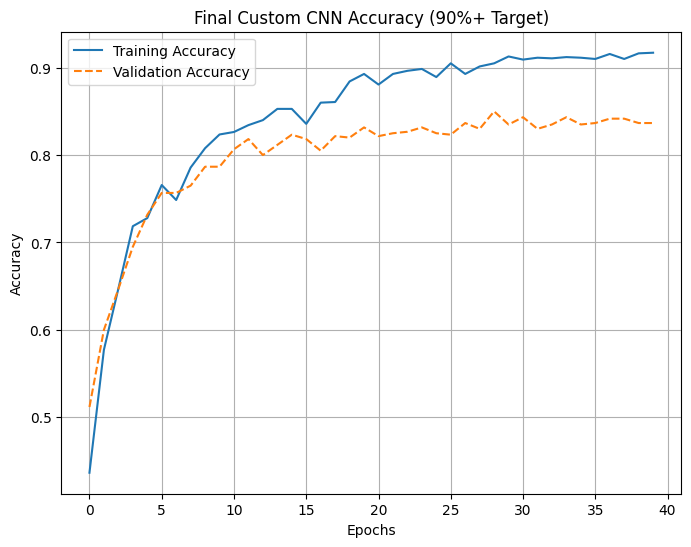

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

data_path = "/content/drive/MyDrive/dataset"

# -------- Data Augmentation (Balanced, Not Excessive) --------
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.1)
    image = tf.image.random_contrast(image, 0.9, 1.1)
    image = tf.image.random_saturation(image, 0.9, 1.1)
    image = tf.image.random_hue(image, 0.05)
    image = tf.image.resize(image, [128, 128])
    return image, label

# -------- Normalization --------
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# -------- Dataset Loader --------
def load_dataset(directory, subset, validation_split=0.3, batch_size=32, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )
    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    if augment:
        dataset = dataset.map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset.prefetch(tf.data.AUTOTUNE)

train_ds = load_dataset(data_path, subset="training", augment=True)
val_ds = load_dataset(data_path, subset="validation")

# -------- Custom CNN Model  --------
def build_model(input_shape=(128, 128, 3), num_classes=4):
    l2 = keras.regularizers.l2(1e-5)
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, 3, padding="same", kernel_regularizer=l2)(inputs)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(128, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(128, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256, kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        metrics=["accuracy"]
    )
    return model

# -------- Callbacks --------
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True)
]

# -------- Train --------
model = build_model()
model.summary()
history = model.fit(train_ds, validation_data=val_ds, epochs=40, callbacks=callbacks)

# -------- Evaluate --------
val_loss, val_acc = model.evaluate(val_ds)
train_acc = history.history["accuracy"][-1]
print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Validation Accuracy: {val_acc*100:.2f}%")

# -------- Save --------
model.save("custom_cnnn.keras")

# -------- Plot --------
plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", linestyle="dashed")
plt.title("Final Custom CNN Accuracy (90%+ Target)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_17 (LeakyReLU)           │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_18 (LeakyReLU)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_19 (LeakyReLU)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_20 (LeakyReLU)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_21 (LeakyReLU)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,584,004 (17.49 MB)

 Trainable params: 4,584,004 (17.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.3505 - loss: 1.3735 - val_accuracy: 0.5083 - val_loss: 1.2019 - learning_rate: 5.0000e-04
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.5376 - loss: 1.1462 - val_accuracy: 0.5817 - val_loss: 1.1014 - learning_rate: 5.0000e-04
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.6204 - loss: 1.0123 - val_accuracy: 0.6667 - val_loss: 0.9717 - learning_rate: 5.0000e-04
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.6448 - loss: 0.9660 - val_accuracy: 0.6550 - val_loss: 0.9272 - learning_rate: 5.0000e-04
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.6690 - loss: 0.9170 - val_accuracy: 0.7317 - val_loss: 0.8754 - learning_rate: 5.0000e-04
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.7253 - loss: 0.8698 - val_accuracy: 0.7183 - val_loss: 0.8508 - learning_rate: 5.0000e-04
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7277 

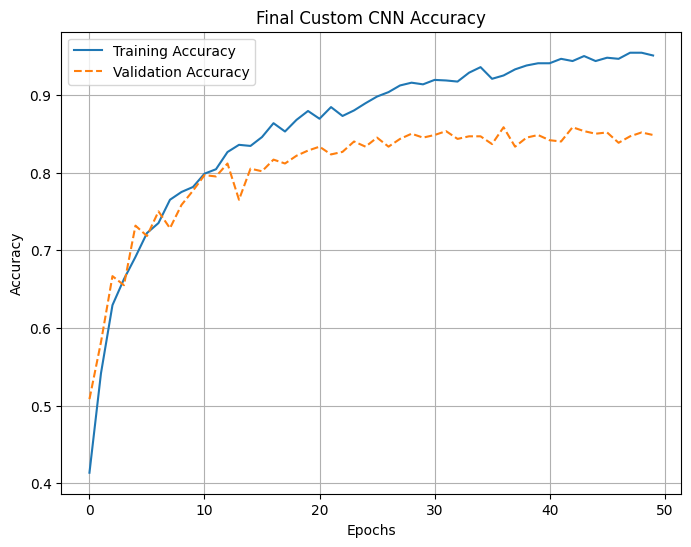

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# -------- Dataset Path --------
data_path = "/content/drive/MyDrive/dataset"

# -------- Data Augmentation (Balanced) --------
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.1)
    image = tf.image.random_contrast(image, 0.9, 1.1)
    image = tf.image.random_saturation(image, 0.9, 1.1)
    image = tf.image.random_hue(image, 0.05)
    image = tf.image.resize(image, [128, 128])
    return image, label

# -------- Normalization --------
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# -------- Dataset Loader --------
def load_dataset(directory, subset, validation_split=0.3, batch_size=32, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )
    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    if augment:
        dataset = dataset.map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset.prefetch(tf.data.AUTOTUNE)

# -------- Load Datasets --------
train_ds = load_dataset(data_path, subset="training", augment=True)
val_ds = load_dataset(data_path, subset="validation")

# -------- CNN Model Definition --------
def build_model(input_shape=(128, 128, 3), num_classes=4):
    l2 = keras.regularizers.l2(1e-5)
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, 3, padding="same", kernel_regularizer=l2)(inputs)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(128, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(256, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256, kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        metrics=["accuracy"]
    )
    return model

# -------- Callbacks --------
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True)
]

# -------- Train --------
model = build_model()
model.summary()
history = model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=callbacks)

# -------- Evaluate --------
val_loss, val_acc = model.evaluate(val_ds)
train_acc = history.history["accuracy"][-1]
print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Validation Accuracy: {val_acc*100:.2f}%")

# -------- Save --------
model.save("final_custom_cnn_model.keras")

# -------- Plot Accuracy --------
plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", linestyle="dashed")
plt.title("Final Custom CNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# -------- Dataset Path --------
data_path = "/content/drive/MyDrive/dataset"

# -------- Data Augmentation (Enabled Again) --------
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.1)
    image = tf.image.random_contrast(image, 0.9, 1.1)
    image = tf.image.random_saturation(image, 0.9, 1.1)
    image = tf.image.random_hue(image, 0.05)
    image = tf.image.resize(image, [128, 128])
    return image, label

# -------- Normalization --------
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# -------- Dataset Loader --------
def load_dataset(directory, subset, validation_split=0.3, batch_size=32, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )
    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    if augment:
        dataset = dataset.map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset.prefetch(tf.data.AUTOTUNE)

# -------- Load Datasets --------
train_ds = load_dataset(data_path, subset="training", augment=True)
val_ds = load_dataset(data_path, subset="validation")

# -------- CNN Model Definition --------
def build_model(input_shape=(128, 128, 3), num_classes=4):
    l2 = keras.regularizers.l2(1e-4)
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, 3, padding="same", kernel_regularizer=l2)(inputs)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(128, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(256, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256, kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
        metrics=["accuracy"]
    )
    return model

# -------- Callbacks --------
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, verbose=1),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True)
]

# -------- Train Model --------
model = build_model()
model.summary()
history = model.fit(train_ds, validation_data=val_ds, epochs=60, callbacks=callbacks)

# -------- Evaluate --------
val_loss, val_acc = model.evaluate(val_ds)
train_acc = history.history["accuracy"][-1]
print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Validation Accuracy: {val_acc*100:.2f}%")

# -------- Save --------
model.save("cnn_boosted_model.keras")

# -------- Plot Accuracy --------
plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", linestyle="dashed")
plt.title("CNN Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,584,004 (17.49 MB)

 Trainable params: 4,584,004 (17.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.3423 - loss: 1.4216 - val_accuracy: 0.4333 - val_loss: 1.2970 - learning_rate: 5.0000e-04
Epoch 2/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.5324 - loss: 1.1959 - val_accuracy: 0.5467 - val_loss: 1.1164 - learning_rate: 5.0000e-04
Epoch 3/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.6164 - loss: 1.0269 - val_accuracy: 0.6500 - val_loss: 0.9807 - learning_rate: 5.0000e-04
Epoch 4/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.6552 - loss: 0.9399 - val_accuracy: 0.7000 - val_loss: 0.9141 - learning_rate: 5.0000e-04
Epoch 5/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.6630 - loss: 0.9431 - val_accuracy: 0.7017 - val_loss: 0.8890 - learning_rate: 5.0000e-04
Epoch 6/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.7308 - loss: 0.8701 - val_accuracy: 0.7467 - val_loss: 0.8040 - learning_rate: 5.0000e-04
Epoch 7/60
44/44 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.7160 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-53b4d2f09284>", line 92, in <cell line: 0>
    history = model.fit(train_ds, validation_data=val_ds, epochs=60, callbacks=callbacks)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit
    logs = self.train_function(iterator)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function
    opt_outputs = multi_step_on_iterator(iterator)
                  ^^^^^^^^^^^^^

TypeError: object of type 'NoneType' has no len()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# -------- Dataset Path --------
data_path = "/content/drive/MyDrive/dataset"

# -------- Augmentation Function --------
def augment_image(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.15)
    image = tf.image.random_contrast(image, 0.9, 1.2)
    image = tf.image.random_saturation(image, 0.9, 1.2)
    image = tf.image.random_hue(image, 0.05)
    image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    return image, label

# -------- Preprocessing --------
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# -------- Load Dataset --------
def load_dataset(directory, subset, validation_split=0.3, batch_size=32, augment=False):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory,
        image_size=(128, 128),
        batch_size=batch_size,
        validation_split=validation_split,
        subset=subset,
        seed=42,
        label_mode='categorical'
    )
    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    if augment:
        dataset = dataset.map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset.prefetch(tf.data.AUTOTUNE)

train_ds = load_dataset(data_path, subset="training", augment=True)
val_ds = load_dataset(data_path, subset="validation")

# -------- CNN Model Definition --------
def build_model(input_shape=(128, 128, 3), num_classes=4):
    l2 = keras.regularizers.l2(1e-4)
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, 3, padding="same", kernel_regularizer=l2)(inputs)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(32, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(64, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(128, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(128, 3, padding="same", kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, kernel_regularizer=l2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = keras.Model(inputs, outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
        metrics=["accuracy"]
    )
    return model

# -------- Callbacks --------
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, verbose=1)
]

# -------- Train --------
model = build_model()
model.summary()
history = model.fit(train_ds, validation_data=val_ds, epochs=80, callbacks=callbacks)

# -------- Evaluate --------
val_loss, val_acc = model.evaluate(val_ds)
train_acc = history.history["accuracy"][-1]
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Validation Accuracy: {val_acc*100:.2f}%")

# -------- Save --------
model.save("cnn_augmented.keras")

# -------- Plot Accuracy --------
plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", linestyle="--")
plt.title("CNN Accuracy After Tuning")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Found 2000 files belonging to 4 classes.
Using 1400 files for training.
Found 2000 files belonging to 4 classes.
Using 600 files for validation.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,0

 Total params: 321,060 (1.22 MB)

 Trainable params: 321,060 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
44/44 ━━━━━━━━━━━━━━━━━━━━ 251s 5s/step - accuracy: 0.2613 - loss: 1.4332 - val_accuracy: 0.2550 - val_loss: 1.4264 - learning_rate: 5.0000e-04
Epoch 2/80
44/44 ━━━━━━━━━━━━━━━━━━━━ 247s 5s/step - accuracy: 0.2909 - loss: 1.4283 - val_accuracy: 0.2900 - val_loss: 1.4210 - learning_rate: 5.0000e-04
Epoch 3/80
44/44 ━━━━━━━━━━━━━━━━━━━━ 219s 5s/step - accuracy: 0.3594 - loss: 1.3927 - val_accuracy: 0.3350 - val_loss: 1.4027 - learning_rate: 5.0000e-04
Epoch 4/80
44/44 ━━━━━━━━━━━━━━━━━━━━ 260s 5s/step - accuracy: 0.3527 - loss: 1.4011 - val_accuracy: 0.3583 - val_loss: 1.3840 - learning_rate: 5.0000e-04
Epoch 5/80
44/44 ━━━━━━━━━━━━━━━━━━━━ 212s 5s/step - accuracy: 0.3732 - loss: 1.3808 - val_accuracy: 0.2950 - val_loss: 1.3922 - learning_rate: 5.0000e-04
Epoch 6/80
44/44 ━━━━━━━━━━━━━━━━━━━━ 219s 5s/step - accuracy: 0.3615 - loss: 1.3903 - val_accuracy: 0.4200 - val_loss: 1.3448 - learning_rate: 5.0000e-04
Epoch 7/80
44/44 ━━━━━━━━━━━━━━━━━━━━ 200s 5s/step - accuracy: 0.3853 